# RUNX1 MD fit to distributions

In [39]:
import matplotlib
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats as stats
from scipy.stats import uniform
import pylab as pl

import seaborn as sns
sns.set()

### Sample data

In [26]:
#Mary's dataset

#RUNX1_offset=[0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,2,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,2,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,2,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,2,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
#RUNX1_active=[0,0,0,1,1,0,0,2,0,1,0,1,0,0,1,2,0,1,1,0,1,1,1,2,1,1,1,1,2,2,0,1,0,2,0,4,2,3,0,0,2,0,2,0,1,0,0,0,3,1,1,0,0,4,3,1,0,2,1,2,1,5,1,1,3,2,1,0,0,0,1,0,2,0,1,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,2,4,1,1,1,2,1,0,3,0,0,0,0,3,1,0,0,0,4,1,2,0,0,0,3,1,0,0,0,1,0,0,1,2,0,0,3,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,4,3,0,1,1,0,1,0,1,1,0,1,0,3,1,0,2,1,0,1,0,1,2,1,1,0,0,1,0,0,2,1,1,1,1,1,2,1,1,2,1,1,0,2,1,0,0,0,1,2,1,0,2,0,0,4,1,1,0,2,1,1,2,1,1,2,2,2,2,0,0,1,1,3,0,0,0,0,1,0,1,3,0,1,1,2,2,0,1,1,0,1,1,0,0,0,0,1,0,3,0,1,1,2,0,1,0,0,2,0,1,1,0,2,1,1,0,0,0,0,1,1,2,0,1,1,0,1,0,1,0,1,2,3,2,1,3,0,1,0,0,2,1,1,0,0,1,1,1,0,0,2,0,1,0,0,3,0,1,0,0,0,0,0,0,1,0,1,3,1,2,1,3,0,2,1,1,0,1,0,2,1,1,1,1,2,2,1,0,2,1,0,2,1,2,0,1,1,3,2,1,1,2,1,2,1,1,0,1,1,1,2,2,0,1,2,1,1,0,0,1,1,1,1,1,1,1,2,1,1,2,0,0,1,1,2,2,0,1,1,2,0,0,0,2,0,1,1,0,1,0,0,1,1,2,0,1,0,2,3,0,1,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,2,1,2,0,0,0,0,0,1,2,0,0,0,2,0,0,1,0,0,0,3,1,1,2,0,0,2,0,2,1,1,0,1,1,0,0,2,2,0,0,3,2,1,2,1,1,1,0,0,2,0,1,1,0,1,0,0,1,2,2,1,3,2,0,1,0,1,0,1,2,2,0,1,1,4,0,0,0,0,1,0,3,2,0,0,0,0,2,0,1,2,0,0,2,1,3,2,1,0,3,0,1,0,1,2,0,1,0,0,1,1,1,0,2,0,1,0,0,1,0,0,3,1,1,0,0,1,0,0,0,1,0,0,2,1,0,2,1,1,2,0,0,1,0,0,1,2,0,2,0,1,1,1,0,1,0,5,2,0,0,0,0,0,2,0,2,0,3,1,2,0,0,2,1,0,1,0,0,0,0,2,1,0,1,0,1,0,2,1,1,0,0,0,1,0,0,2,0,1,1,0,0,1,0,1,2,1,1,1,1,0,0,0,0,0,3,5,1,1,1,0,3,1,0,0,0,0,0,1,2,0,0,0,0,0,1,3,0,0,1,5,3,2,0,0,2,0,1,1,3,3,0,2,1,0,2,0,1,1,2,1,0,1,1,1,0,2,1,0,2,1,0,1,0,0,0,0,0,2,0,4,1,4,0,1,0,2,3,1,0,2,0,0,0,1,1,0,0,2,0,1,1,3,3,0,2,1,0,2,0,1,2,1,1,0,0,2,0,0,2,1,1,1,1,1,0,0,0,1,1,1,0,3,0,2,0,0,1,0,0,1,0,1,1,0,0,4,2,1,0,0,1,2,1,2,1,1,1,1,2,0,0,2,3,2,2,0,1,2,4,1,1,1,0,2,0,0,0,0,0,2,2,1,0,0,1,1,1,1,2,0,0,1,0,1,1,1,0,2,2,3,0,0,0,0,0,2,0,1,2,1,2,1,2,2,1,3,0,1,2,3,1,1,0,1,1,0,0,0,1,1,2,0,0,1,1,1,2,0,0,0,1,2,0,2,2,2,1,2,1,0,1,1,1,0,1,0,1,0,2,0,3,0,1,0,0,1,4,1,1,0,0,0,1,1,1,0,4,0,0,4,0,1,1,1,1,0,0,1,0,3,0,1,0,0,0,1,0,0,0,1,2,1,1,2,3,0,2,1,0,1,5,2,0,0,0,3,0,2,1,2,0,0,0,3,0,0,2,4,1,0,1,1,0,0,0,0,1,1,1,1,3,1,1,1,2,0,1,1,0,2,3,0,1,2,0,1,0,3,0,0,1,1,0,1,0,3,1,0,1,1,3,1,3,0,1,2,1,0,1,0,0,1,1,0,1,5,1,0,1,0,0,2,1,1,1,0,0,2,0,0,0,2,1,0,2,0,2,0,2,0,0,0,1,2,2,1,0,0,2,2,1,1,0,3,0,1,1,1,0,2,2,3,0,0,2,1,1,0,1,0,1,1,0,0,3,2,2,0,1,0,2,1,2,1,0,0,0,0,1,1,1,0,1,0,1,3,1,1,2,1,3,2,0,1,1,1,1,2,2,1,2,1,2,3,0,3,0,3,1,2,0,2,1,0,0,1,0,1,0,0,1,1,0,2,0,0,0,3,0,2,2,1,1,1,1,2,1,2,2,1,2,0,1,0,0,2,0,1,1,0,1,0,2,1,0,0,2,0,0,0,1,0,2,1,0,0,0,1,0,1,1,2,0,0,2,0,2,1,1,0,0,0,0,0,2,0,1,1,1,2,1,1,1,3,1,0,1,0,0,2,3,0,0,1,1,1,2,3,1,2,2,0,0,2,0,2,2,0,2,0,3,2,2,0,2,6,4,0,0,0,0,0,1,2,0,0,0,3,0,3,1,0,1,1,1,0,2,0,1,2,0,1,3,1,2,3,1,1,1,1,2,0,1,3,1,1,1,0,1,2,1,2,1,0,0,1,0,4,2,0,0,1,1,0,1,1,3,1,0,0,2,1,2,3,1,4,0,0,2,3,2,4,0,4,0,3,0,1,0,1,0,3,1,3,2,1,1,1,2,0,1,0,1,1,2,1,2,5,2,1,1,4,1,2,1,1,2,2,1,0,4,0,2,3,2,4,2,1,1,1,0,1,0,1,1,1,0,1,0,0,3,1,2,0,1,0,0,1,0,0,1,4,2,3,0,2,0,0,1,2,0,3,0,0,2,2,2,1,0,3,4,1,5,2,5,2,3,3,0,1,1,1,1,4,0,1,0,1,4,4,0,1,1,3,3,4,5,1,0,5,4,3,2,0,1,1,1,3,2,4,2,2,2,2,1,4,6,2,4,3,2,2,1,3,3,4,3,2,1,6,2,2,2,3,1,2,1,4,1,3,5,2,1,4,1,3,5,1,0,1,3,3,3,2,6,3,2,7,2,5,1,7,2,4,6,6,4,1,5,4,2,3,5,2,2,1,2,3,4,4,2,7,3,3,3,5,1,2,2,3,3,3,4,0,3,7,2,4,3,6,5,5,5,7,4,3,3,4,2,4,0,2,2,1,3,0,5,3,2,2,2,4,3,0,1,1,1,2,0,3,4,2,3,0,1,3,3,1,1,2,2,1,0,2,1,1,6,1,2,2,2,2,0,2,0,0,2,1,4,1,0,1,2,3,1,2,1,0,1,1,4,2,3,1,1,1,1,2,2,0,3,3,1,0,0,3,0,0,1,0,0,0,1,1,2,0,3,0,0,2,2,1,0,2,0,1,1,5,1,1,0,1,1,1,1,2,0,4,3,1,0,3,2,3,3,1,0,3,1,1,2,2,1,1,2,0,3,2,2,1,2,3,1,0,0,2,0,3,1,1,0,1,1,1,1,1,3,1,0,0,0,2,3,1,0,3,0,1,1,2,3,0,1,4,2,1,1,2,0,1,2,0,1,0,0,0,1,1,0,1,2,0,0,2,3,3,1,3,1,0,1,2,1,2,3,2,1,0,2,1,0,0,2,2,0,1,2,0,0,2,0,0,0,0,0,1,0,3,0,0,0,0,2,3,2,1,0,0,3,1,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,2,1,0,1,2,1,1,3,4,0,1,1,0,0,0,0,0,1,0,1,0,1,3,1,1,0,3,2,1,0,1,1,2,0,1,1,0,0,0,1,2,2,0,2,3,2,2,0,2,1,0,0,0,0,1,1,0,1,0,1,2,1,0,0,0,0,0,2,0,3,0,0,0,1,0,1,1,0,1,1,0,2,0,1,1,1,1,1,2,0,1,1,2,1,2,2,0,1,4,1,0,1,0,3,2,0,0,2,3,0,3,0,2,5,2,2,0,1,2,1,1,0,2,1,2,1,1,2,0,0,2,1,1,0,2,2,1,2,2,0,1,2,1,0,0,1,0,1,1,0,4,1,1,2,0,1,2,0,0,0,2,2,1,0,1,1,2,0,3,2,1,0,1,1,3,1,1,1,3,6,1,3,2,0,1,1,0,2,0,1,1,1,0,0,0,1,2,1,2,0,3,2,1,0,0,1,2,1,0,0,1,0,2,0,1,2,3,3,0,2,1,2,2,1,0,1,3,0,2,0,0,1,0,0,0,1,1,2,1,0,0,0,1,0,0,4,1,0,0,2,1,2,2,0,1,0,1,0,2,0,1,1,1,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,1,0,3,0,0,0,0,2,0,0,0,2,0,0,1,1,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,1,2,2,1,0,0,3,2,3,2,0,1,1,0,1,2,1,0,0,2,0,0,2,0,1,2,0,0,1,0,2,2,0,0,2,1,0,0,0,0,2,0,0,1,0,1,1,2,0,1,0,0,3,2,2,0,1,2,0,0,0,0,2,2,0,0,0,1,2,0,0,0,1,0,0,2,1,0,1,3,0,0,1,1,1,1,2,0,0,2,1,0,1,0,1,0,2,0,1,0,1,2,0,4,1,0,1,0,0,2,1,0,1,1,1,1,0,0,1,0,0,0,0,1,0,3,1,0,1,1,1,2,0,1,1,2,3,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,3,3,3,2,1,0,0,1,1,3,4,0,0,3,2,0,2,3,0,2,1,1,1,1,1,0,0,2,1,2,2,0,3,0,1,2,2,1,2,0,0,4,3,0,0,2,2,1,1,2,0,0,4,1,1,1,1,0,1,0,3,0,0,1,0,0,0,2,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,1,1,0,4,0,1,0,0,0,2,0,1,0,0,0,0,1,2,2,1,1,0,1,1,1,0,2,1,0,1,1,1,0,0,2,1,2,3,2,1,1,2,1,0,1,2,0,1,1,1,3,2,0,1,2,2,0,1,1,2,0,4,0,1,0,1,0,1,1,0,0,2,1,0,2,4,1,1,0,1,4,0,1,1,1,1,1,1,1,1,0,2,0,2,1,1,2,0,0,0,2,0,0,2,1,1,2,0,1,1,2,0,0,0,1,1,1,1,1,2,0,0,2,2,2,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,2,1,0,4,0,0,1,0,0,2,2,1,2,1,0,3,0,1,1,0,0,1,3,0,0,0,0,1,1,1,1,1,0,0,1,2,0,2,1,3,0,2,0,1,0,1,0,0,0,2,1,0,0,0,0,1,3,2,1,1,1,0,0,0,0,2,0,1,2,1,0,2,0,1,0,0,0,2,0,1,3,2,1,2,0,0,0,1,0,2,3,1,0,4,0,1,1,1,1,1,3,2,1,3,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,2,2,1,3,1,0,1,1,0,3,1,0,3,3,1,2,1,0,0,3,0,1,0,0,1,1,1,0,0,0,1,2,2,3,1,2,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,1,2,1,0,0,2,3,1,0,3,0,4,1,3,0,1,0,2,4,2,1,0,2,0,0,2,1,0,1,0,3,0,1,0,0,0,0,0,1,0,1,0,3,1,0,2,1,3,3,0,0,0,2,0,0,1,1,1,0,0,3,2,1,2,1,0,0,1,0,0,0,0,0,2,1,0,0,1,1,1,0,1,2,0,1,1,1,1,1,0,0,2,0,1,1,1,0,2,0,1,3,0,2,1,0,3,0,1,0,1,0,0,1,0,1,1,2,0,1,0,3,0,1,0,0,0,0,1,0,1,0,2,1,2,2,0,0,0,4,1,2,0,1,2,1,1,2,0,1,0,2,0,0,0,2,0,1,1,2,1,2,1,1,0,4,2,0,0,0,1,2,0,0,2,0,1,0,1,0,0,3,3,1,0,0,1,0,0,0,0,2,0,3,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,2,2,0,1,0,0,1,0,1,2,0,0,0,0,0,2,3,1,1,1,2,0,1,0,0,0,0,0,1,3,1,1,0,1,1,2,0,0,1,2,0,0,1,0,3,0,1,1,3,0,2,0,2,3,1,1,1,2,2,0,0,0,2,0,2,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,2,1,2,1,1,1,4,1,0,1,0,1,2,0,0,0,0,0,4,0,0,0,0,0,2,0,0,0,2,0,1,0,1,0,1,1,0,1,0,0,2,1,0,1,2,2,0,0,0,0,0,0,0,0,0,0	1,1,0,0,0,0,0,0,2,0,1,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,2,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,2,0,1,0,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,3,0,0,2,0,2,1,0,3,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,2,0,0,1,0,0,1,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,2,0,0,1,0,1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,2,1,0,0,0,2,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,2,0,0,0,1,1,0,0,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,1,0,1,1,0,1,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,2,0,0,1,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,2,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,0,1,0,0,1,1,0,0,0,0,0,0,2,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,2,0,0,0,0,0,0,0,0,1,0,0,1,1,2,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,2,0,2,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,2,0,1,0,0,1,0,0,0,1,1,0,4,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,1,0,1,0,0,0,2,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,3,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,2,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,1,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0,2,2,0,1,1,0,0,1,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,2,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,4,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,2,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,0,0,0,1,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,2,1,0,1,0,2,0,0,0,1,0,1,0,2,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,2,0,2,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,2,4,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,3,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,2,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,2,0,0,0,0,0,0,0,1,1,2,0,1,0,0,2,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,1,0,0,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,2,0,1,0,0,2,2,0,0,0,0,3,1,1,0,0,0,2,0,1,1,0,0,0,1,0,1,1,0,1,0,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,0,2,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,2,0,0,1,2,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,2,0,1,1,0,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,2,0,1,1,1,0,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,2,0,0,1,0,0,0,0,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0	1,1,0,1,1,0,0,2,2,1,1,1,0,1,1,3,0,2,1,0,1,2,2,3,2,2,3,1,2,2,0,1,1,2,0,4,3,4,1,0,3,0,2,1,2,0,0,0,4,1,1,0,0,5,3,1,0,2,1,2,1,5,1,1,4,2,1,1,0,1,1,0,2,1,1,0,0,1,1,1,0,1,0,2,1,1,1,1,0,1,2,1,2,2,5,1,1,1,2,1,0,3,0,0,1,1,4,1,1,1,0,6,1,3,0,0,1,3,2,1,0,1,2,1,0,1,2,0,0,3,1,2,1,0,0,2,1,0,0,0,0,0,0,4,0,0,2,0,2,1,1,3,1,1,2,4,4,0,1,1,0,2,0,1,1,0,1,0,3,1,0,3,1,0,1,1,1,2,1,2,0,0,1,0,1,2,1,1,1,1,1,2,1,1,2,1,1,0,3,1,0,0,0,1,2,1,0,2,1,0,6,1,2,0,2,2,2,2,2,1,3,2,2,3,0,0,1,1,4,0,2,0,0,2,0,1,4,1,2,2,3,2,0,1,2,0,2,1,0,1,0,0,1,0,3,0,1,1,2,0,1,0,0,2,0,2,1,1,2,1,1,0,0,0,0,1,1,3,1,1,2,1,1,1,1,2,1,2,4,2,2,6,0,1,0,1,2,1,1,0,0,1,1,1,0,0,2,1,2,0,0,4,1,1,0,0,0,0,0,1,2,0,1,3,1,2,1,3,0,2,1,1,0,1,0,2,1,1,1,2,2,3,1,0,2,2,0,2,1,2,0,1,1,3,2,2,1,4,1,2,1,1,0,2,1,1,4,2,0,2,2,2,1,0,0,1,1,1,1,2,1,1,2,3,1,2,0,0,1,1,2,3,0,1,2,2,0,1,0,2,1,1,1,2,2,0,0,1,3,2,1,2,0,2,4,1,1,1,1,0,1,0,0,0,0,2,2,1,1,0,0,1,2,1,2,0,0,2,0,0,1,3,0,0,0,3,0,1,1,1,0,0,4,1,2,3,0,0,2,1,3,1,2,0,1,1,0,0,2,3,0,0,3,2,1,2,2,1,1,0,1,3,0,1,2,0,2,0,0,1,2,3,1,4,2,2,1,0,1,1,2,2,2,3,1,1,4,0,0,0,0,1,1,3,2,1,0,0,0,2,0,1,2,0,0,2,1,3,2,2,0,3,0,2,1,1,2,0,1,0,0,1,1,1,0,2,1,1,2,0,1,0,1,4,1,2,1,0,2,0,1,2,1,0,0,3,1,0,2,1,1,2,0,0,1,1,0,2,3,0,3,1,2,1,1,1,1,1,5,2,0,1,0,0,0,2,0,2,0,5,1,3,1,0,2,1,0,1,2,0,0,1,2,1,0,1,0,1,0,2,2,1,1,0,0,1,0,0,2,0,1,1,0,1,1,0,1,2,1,3,2,1,0,0,0,1,1,3,5,1,1,1,0,4,1,0,1,0,0,0,2,2,0,1,0,0,0,2,3,0,1,1,6,4,2,2,0,2,0,1,1,3,3,1,2,1,0,2,0,1,1,2,1,1,1,1,2,1,3,2,0,2,1,0,2,0,1,0,0,0,2,0,5,1,4,0,2,0,2,4,1,1,2,2,0,0,2,1,1,0,2,1,2,2,3,3,0,3,1,0,2,0,1,2,2,1,0,0,2,3,0,2,1,2,1,1,1,0,0,0,2,1,1,0,3,0,3,0,0,3,3,0,1,1,1,2,0,0,4,2,1,0,0,1,2,2,3,1,1,1,1,2,0,1,2,3,2,3,0,1,3,4,1,1,2,1,2,1,0,1,0,0,2,2,1,0,0,1,1,1,1,2,0,0,1,0,1,1,1,0,2,3,3,0,0,1,0,0,2,0,1,2,1,3,1,3,4,1,3,1,1,2,3,2,1,0,1,2,0,0,0,2,1,2,0,0,1,1,2,2,0,0,0,1,2,0,3,4,3,2,2,1,0,2,1,1,1,1,0,1,1,2,0,3,1,1,0,0,2,4,1,1,1,0,0,2,1,1,0,4,0,2,4,0,1,1,2,1,0,1,1,1,4,0,1,0,0,1,2,0,0,0,1,2,2,1,2,3,2,2,1,1,1,5,3,1,1,0,3,0,3,1,3,0,1,0,4,0,0,2,4,1,1,1,1,0,0,0,0,1,1,2,1,3,1,1,1,2,0,1,1,0,2,3,0,1,2,0,1,0,3,0,0,1,1,0,1,0,3,1,0,1,1,3,1,3,1,1,2,1,0,1,0,0,1,1,0,1,5,1,0,3,0,0,2,2,1,1,0,1,3,0,0,0,3,1,1,2,0,3,0,2,0,0,0,2,2,2,2,0,0,2,2,1,1,1,3,0,1,1,1,0,2,2,3,0,0,2,1,1,0,1,0,1,1,0,0,3,2,2,0,1,1,2,1,2,1,0,0,0,0,1,1,1,0,2,2,2,4,1,2,2,1,4,3,0,1,1,1,1,2,4,1,2,1,3,3,0,4,0,3,1,2,1,3,1,0,0,1,0,1,1,0,1,1,0,2,0,1,0,3,0,2,2,1,1,1,1,2,2,2,2,1,3,0,1,1,0,2,0,1,1,1,1,1,2,2,0,0,2,0,0,1,1,1,2,2,0,1,0,1,0,1,2,2,0,1,2,0,2,1,2,0,1,0,1,0,2,0,1,2,1,2,1,1,1,4,1,0,1,0,0,2,3,0,0,1,1,1,2,3,1,2,2,0,0,3,0,2,2,0,3,0,3,2,3,0,2,6,5,0,0,0,0,0,1,3,0,0,0,3,0,3,2,0,1,1,1,0,2,0,2,2,0,1,4,1,2,3,2,1,1,2,2,0,1,4,1,1,2,0,2,2,1,2,2,1,1,1,0,5,2,0,0,1,1,0,1,1,3,1,0,0,2,1,3,3,1,4,1,0,3,3,2,5,0,5,0,3,0,2,0,1,0,3,2,3,2,1,2,1,2,0,1,0,1,1,2,1,2,6,4,1,2,5,1,2,1,1,3,2,1,1,4,0,2,3,2,4,2,1,1,1,2,2,2,1,1,1,0,1,0,0,3,2,2,0,2,1,2,1,2,0,1,5,2,3,0,2,0,0,2,2,0,3,0,0,2,3,2,3,0,3,4,1,5,2,5,3,3,3,0,1,1,2,2,4,1,2,0,1,5,4,1,2,2,3,3,4,5,1,0,5,4,3,2,0,1,2,1,4,2,4,2,3,2,4,1,6,6,2,4,3,2,2,1,3,3,5,3,2,3,6,2,2,4,3,2,2,1,5,1,3,5,3,2,4,5,4,6,1,0,1,4,4,4,3,7,3,2,7,2,5,1,7,2,4,6,6,4,1,5,4,2,3,7,2,4,1,2,4,4,5,2,7,3,5,3,5,2,2,2,3,4,3,4,1,3,7,3,4,3,6,8,5,6,8,4,3,3,5,3,4,0,2,2,2,3,0,5,5,5,2,3,4,3,1,1,1,2,2,0,3,4,2,3,0,2,3,3,1,1,2,2,1,0,2,1,1,6,1,5,2,2,2,0,2,0,0,2,2,4,1,0,2,2,3,1,2,1,1,1,1,5,2,3,1,2,1,1,2,2,0,3,4,1,0,0,3,0,0,2,0,0,0,3,1,3,0,3,0,0,2,2,1,0,2,2,1,1,5,1,1,1,1,1,2,1,2,0,4,4,1,1,3,3,4,3,1,0,4,1,1,3,2,1,2,2,0,3,2,3,2,2,4,1,0,1,3,0,3,2,1,0,1,1,1,1,1,3,2,0,0,1,2,3,1,0,3,0,3,1,2,3,0,1,4,3,1,1,2,0,1,2,0,2,0,0,0,1,1,0,2,2,0,0,2,3,3,1,3,1,1,1,3,1,3,4,3,1,0,2,3,1,0,2,2,0,1,2,1,0,2,0,0,0,0,0,1,0,4,0,1,0,0,2,3,2,1,0,0,3,1,1,0,1,1,1,2,1,0,2,0,0,0,0,1,1,2,1,1,1,2,1,1,3,4,0,1,1,0,0,0,0,0,1,0,2,0,2,4,1,1,0,3,2,1,0,1,1,2,0,1,1,1,2,0,1,2,2,0,2,3,2,2,2,3,1,0,0,0,0,2,2,2,1,0,2,2,1,1,0,0,0,0,2,0,3,0,0,0,1,0,1,2,0,1,1,0,3,0,1,1,1,1,1,2,0,1,1,2,2,3,2,0,1,4,1,0,1,0,3,2,0,0,2,3,0,3,0,2,5,2,2,0,1,2,1,1,1,3,1,4,1,1,2,2,2,2,2,2,0,2,3,1,4,2,0,1,2,1,1,0,1,0,2,1,0,4,1,1,3,0,1,2,1,0,0,2,2,1,1,1,1,2,1,3,3,1,1,1,1,3,1,1,1,3,6,1,4,2,0,1,2,0,2,1,1,1,1,0,0,2,1,2,1,2,0,3,3,1,0,0,1,2,1,0,0,1,0,2,0,1,2,4,3,0,2,1,2,3,1,0,1,3,0,2,2,0,2,1,1,0,1,1,2,1,0,1,0,1,0,0,4,2,0,2,3,2,2,3,0,1,0,1,1,2,0,1,1,1,1,1,1,1,0,1,1,0,1,0,2,1,0,1,1,0,3,1,2,0,4,0,0,0,0,3,1,0,0,2,1,0,1,1,0,0,0,1,1,1,0,1,1,1,1,2,0,1,0,1,3,2,1,0,0,3,2,3,2,0,2,1,0,1,2,1,0,0,2,0,0,2,0,1,2,0,0,1,0,2,3,0,0,2,2,0,0,1,0,2,0,0,1,0,1,3,2,0,1,1,0,3,3,2,0,1,2,0,0,1,0,2,2,0,0,1,1,6,0,1,0,1,0,1,2,2,0,1,4,0,0,2,2,1,1,2,1,0,2,1,0,1,0,3,0,3,0,3,0,2,2,0,4,1,0,1,0,0,2,1,1,1,1,1,1,0,0,1,1,0,1,0,1,1,3,2,0,1,1,1,2,0,1,1,2,3,0,0,1,0,0,2,3,0,0,0,1,0,1,1,0,2,3,6,3,3,1,0,0,1,1,3,4,0,0,3,2,1,2,3,0,4,1,1,3,2,1,1,0,4,1,2,2,1,3,1,1,4,3,1,2,0,0,5,3,0,0,3,2,2,1,2,1,1,5,1,2,1,1,0,1,0,3,0,0,1,2,0,2,2,0,1,1,0,1,0,1,0,1,0,1,2,1,0,0,1,1,0,4,0,1,0,1,0,2,0,1,1,0,0,0,1,3,2,2,2,0,1,1,2,0,3,1,1,1,2,1,0,0,3,2,2,4,3,2,1,2,1,0,1,3,0,1,1,2,3,2,1,2,2,2,1,1,1,3,1,4,1,1,1,1,1,1,1,0,1,2,1,0,2,5,3,5,0,1,5,0,2,1,1,1,2,1,1,1,0,3,1,2,1,1,5,0,0,0,3,0,0,2,1,1,2,1,1,2,2,1,0,0,1,1,2,1,1,2,2,0,2,2,2,0,0,1,0,1,1,1,1,1,1,2,1,2,0,1,3,1,0,4,0,0,3,0,1,2,3,1,2,1,1,3,0,1,1,0,0,1,3,0,0,0,0,1,1,1,2,1,2,0,1,3,1,2,1,3,0,3,0,1,0,1,1,1,0,2,1,0,0,1,0,1,3,3,1,1,2,0,1,1,0,2,1,1,2,3,0,2,1,2,0,0,1,2,0,2,4,2,2,2,1,0,0,2,0,2,3,1,0,5,0,1,2,4,1,1,3,2,1,4,0,0,0,0,1,0,0,1,1,1,1,0,3,1,0,1,0,1,1,1,2,1,2,2,3,1,3,3,0,1,2,0,3,2,0,3,4,1,3,1,0,0,4,1,1,1,0,1,1,1,0,1,0,1,3,3,3,1,3,0,1,1,1,1,2,0,0,0,0,4,1,0,1,0,0,2,2,1,0,0,2,3,3,0,3,1,4,1,6,0,1,0,2,5,3,1,0,2,0,0,2,1,0,1,1,5,0,1,0,0,0,0,0,1,1,3,0,4,1,0,4,3,3,3,0,0,3,3,1,0,1,1,3,0,1,4,2,1,2,2,0,1,2,0,1,0,1,2,2,2,0,0,1,1,1,1,1,2,0,1,1,1,1,1,1,0,3,0,1,1,1,0,4,0,3,3,1,3,1,0,3,0,2,0,1,1,1,1,0,2,2,2,0,2,0,3,0,1,2,0,0,1,3,1,1,1,3,1,2,2,0,0,0,5,1,2,0,1,2,1,1,2,0,1,2,4,1,0,0,2,0,2,1,2,1,2,1,1,0,4,2,1,0,0,1,3,0,0,2,1,1,0,1,0,1,3,3,1,0,1,1,0,0,0,0,3,0,3,1,3,1,0,1,2,0,1,0,1,0,0,0,1,0,2,2,0,2,0,0,2,0,2,4,0,1,1,0,2,3,3,1,1,1,2,0,2,0,0,1,0,0,1,3,1,1,0,2,1,4,0,1,2,3,0,1,2,1,3,1,2,2,3,0,2,1,2,3,1,2,2,2,2,0,0,0,2,0,2,0,1,2,0,0,1,0,1,1,0,2,3,0,1,0,2,1,2,1,2,1,4,1,0,1,0,2,2,0,1,0,1,0,4,1,1,0,1,1,2,0,0,0,3,0,1,1,1,0,1,1,0,2,0,0,3,1,0,1,3,3,0,0,0,0,0,0,0,0,0,0]
SRR1552480 = "0,1,0,0,1,0,1,0,0,1,3,0,2,1,1,0,2,1,1,1,0,1,0,1,3,0,2,2,1,1,0,0,4,3,0,0,0,1,2,1,2,0,0,0,0,0,1,1,2,0,0,1,2,0,2,1,1,0,0,0,1,1,1,0,2,0,3,0,2,1,0,2,1,3,1,2,1,2,2,2,0,1,1,0,0,1,0,2,2,0,4,0,0,1,1,0,0,2,0,2,1,1,0,2,0,1,0,1,2,1,2,2,1,1,2,1,0,0,0,0,0,1,1,2,5,1,0,1,2,1,1,0,1,0,0,0,1,1,3,1,1,3,1,0,2,1,0,2,1,1,1,1,0,0,2,0,1,2,0,0,0,1,1,0,1,0,0,2,1,1,0,1,1,0,1,1,1,1,0,3,0,2,1,1,0,1,0,0,1,2,1,2,1,3,1,1,2,1,2,1,1,1,1,1,1,0,1,2,0,0,1,2,3,1,2,0,0,4,0,1,1,1,1,0,1,4,1,0,1,1,2,2,1,0,1,3,0,1,1,0,2,1,0,2,0,2,1,0,1,1,0,0,0,0,0,1,2,0,2,3,3,1,0,0,1,1,0,1,0,0,3,0,0,1,2,1,2,1,0,2,0,1,1,0,3,2,1,1,1,1,0,0,1,1,1,0,0,1,2,0,1,0,1,2,2,0,0,1,0,0,1,1,1,1,1,0,0,1,1,0,2,0,0,2,0,0,1,0,1,1,3,0,0,0,2,0,0,4,0,1,1,0,0,1,2,0,2,2,1,4,0,1,1,0,3,1,0,2,0,0,0,0,0,1,0,1,0,0,2,0,1,0,0,0,1,0,0,0,0,3,2,0,1,0,0,2,1,1,0,2,1,0,2,1,1,0,0,1,1,0,1,2,1,0,1,0,0,0,0,1,1,0,1,0,0,0,2,1,1,2,1,1,1,2,2,3,1,0,0,0,0,0,2,0,2,1,2,1,1,1,0,1,2,1,0,1,1,0,1,1,4,1,2,0,1,0,0,1,2,3,3,0,0,1,1,2,1,2,1,0,0,2,1,0,2,1,1,1,3,1,3,0,1,3,2,0,3,2,1,0,0,1,2,1,2,1,0,2,2,4,2,2,0,0,0,1,0,2,1,0,2,1,1,1,1,0,3,3,1,1,0,2,0,0,3,0,4,1,3,0,0,3,1,0,2,2,2,3,0,0,1,2,1,5,3,2,2,1,0,3,1,1,0,0,0,0,0,0,0,1,1,1,2,1,0,2,2,0,2,2,0,0,1,2,0,0,2,0,1,2,2,0,1,0,0,2,1,1,1,1,0,0,1,2,0,1,2,3,2,0,2,1,2,0,1,2,4,0,1,5,0,0,0,3,2,1,0,0,1,0,0,1,1,2,2,1,1,1,1,2,0,1,0,2,1,1,0,0,1,0,1,1,1,3,2,1,0,2,1,1,2,3,0,2,1,0,2,1,1,0,1,1,1,0,2,1,1,3,1,1,1,1,0,2,0,3,5,3,0,1,0,2,2,1,1,0,0,1,0,2,0,2,0,0,1,5,3,0,1,2,1,2,0,1,2,0,1,2,0,1,0,0,1,0,3,1,0,0,2,0,0,2,1,1,1,2,2,3,0,0,2,0,1,0,0,1,0,0,0,1,0,1,2,1,0,0,1,0,1,1,0,1,2,1,0,1,2,2,0,2,1,0,3,1,1,0,0,0,3,1,1,2,0,2,0,0,1,0,1,1,1,2,1,1,2,1,0,3,0,1,1,0,0,0,1,0,0,2,0,2,1,1,1,4,1,0,1,1,0,2,0,0,1,0,2,0,1,1,1,0,2,0,1,1,0,0,0,1,3,2,1,1,1,1,0,2,3,3,0,2,0,1,2,1,0,0,1,1,0,0,1,0,1,3,0,1,2,1,0,0,1,2,1,0,4,1,3,4,1,0,0,2,2,2,0,2,0,1,1,0,1,1,1,2,2,1,0,2,0,1,1,2,1,1,2,1,0,5,3,3,3,2,2,0,1,0,0,0,0,1,6,1,2,0,0,1,3,0,1,0,1,2,2,0,1,2,2,2,2,3,0,0,0,1,2,0,4,2,0,1,1,1,2,6,1,1,1,1,3,1,5,2,0,0,2,4,1,6,3,4,7,5,3,1,2,2,3,1,4,2,2,4,4,3,7,4,4,1,4,3,5,2,7,4,8,5,7,2,4,8,4,6,9,4,5,1,11,6,3,1,9,4,5,6,2,5,3,3,4,4,2,4,3,1,6,2,4,2,4,6,5,5,1,5,2,2,4,3,4,2,2,3,1,2,3,0,2,1,1,0,1,1,1,1,2,2,0,2,2,2,2,4,1,4,3,3,2,1,4,2,0,6,1,2,5,1,4,4,0,3,2,4,2,5,9,0,7,4,8,4,7,6,7,7,12,4,5,7,10,5,6,2,8,7,6,4,5,7,6,5,9,10,9,16,9,10,12,7,9,8,10,18,12,7,7,11,10,11,9,10,7,2,7,14,8,7,8,6,7,10,6,11,7,7,8,10,11,10,6,3,7,1,6,8,4,1,4,4,5,3,3,3,1,2,3,3,2,3,6,1,2,1,2,2,3,0,1,2,2,4,3,3,4,0,0,1,1,1,0,2,0,0,0,0,1,1,4,3,3,1,0,2,5,0,2,4,0,1,1,0,2,1,0,1,1,2,0,0,1,1,0,0,0,1,0,1,1,1,1,0,1,3,1,0,2,0,3,3,0,0,1,1,1,0,3,1,1,2,3,2,1,0,0,3,0,2,1,0,0,2,2,1,0,0,0,2,3,1,0,3,0,0,2,0,2,1,1,2,0,3,0,0,0,1,0,2,2,2,1,1,0,0,2,1,1,0,1,2,2,0,3,1,0,0,1,0,2,1,4,1,0,3,0,3,0,1,2,1,1,0,2,1,1,0,3,0,0,3,1,1,0,2,2,0,2,1,2,3,1,0,1,0,0,1,1,5,3,1,1,1,2,2,1,1,0,2,1,0,0,0,1,1,0,2,2,0,1,1,1,0,1,3,1,2,0,3,0,3,1,1,1,1,0,0,2,0,2,0,3,1,0,1,0,1,0,0,2,1,2,2,1,1,0,0,0,2,0,0,1,2,0,4,3,1,0,0,0,2,0,2,1,0,0,0,4,0,1,2,1,0,0,2,0,2,2,3,3,1,3,0,1,2,0,2,1,0,2,1,1,1,3,1,3,1,0,2,1,2,3,2,1,1,0,2,2,1,3,2,2,0,5,1,1,2,1,4,2,0,1,1,2,1,4,1,1,2,0,3,2,2,2,2,0,1,4,1,1,3,1,2,2,1,1,1,5,2,1,0,1,1,2,1,4,3,1,2,0,1,2,0,3,1,5,3,0,1,2,5,1,0,2,2,4,2,2,3,3,0,2,3,1,0,0,2,2,1,2,0,1,4,3,2,2,1,3,4,2,0,0,3,2,2,2,1,0,1,2,1,0,1,2,6,0,3,1,0,3,3,3,0,0,0,2,0,0,1,2,3,3,2,1,2,1,1,3,2,3,1,1,1,0,0,2,0,0,1,0,0,0,0,3,2,0,0,2,0,4,0,0,2,1,1,0,0,2,2,1,0,3,2,2,1,0,0,0,0,2,4,0,0,3,1,2,1,2,0,1,3,1,0,1,0,1,2,2,1,1,0,1,2,2,0,1,1,3,2,0,2,0,1,0,1,0,2,0,2,2,0,1,0,2,1,1,3,2,3,0,0,1,4,1,3,0,2,0,0,1,1,2,1,1,3,1,0,2,0,3,2,2,2,1,2,0,1,1,0,2,2,0,2,0,0,2,3,0,0,3,0,1,0,2,1,2,1,2,0,0,1,1,0,2,1,2,2,0,1,1,1,0,1,1,1,1,1,2,0,0,1,0,0,1,1,2,1,1,1,2,0,0,2,1,4,0,2,0,2,2,0,2,2,1,2,1,0,1,2,1,0,1,0,1,1,0,1,1,0,1,3,4,1,0,2,0,1,4,2,0,2,1,1,2,0,0,1,2,0,1,2,1,0,0,2,2,0,5,0,3,3,2,0,3,3,3,2,2,0,2,2,0,0,1,2,0,6,1,0,1,4,1,1,3,3,1,2,1,0,2,1,1,2,0,4,2,2,2,2,2,3,1,5,4,7,5,3,6,2,4,12,5,6,5,12,3,5,7,5,4,5,5,4,6,6,9,11,8,11,3,9,8,5,4,9,5,8,6,6,11,9,6,4,10,5,10,7,10,9,6,9,2,4,8,5,6,1,8,5,7,4,5,4,4,13,8,4,4,5,4,6,3,7,7,2,3,3,2,5,0,3,0,1,2,2,1,2,2,2,1,2,2,2,5,1,8,2,2,1,2,2,2,2,3,0,1,2,0,0,1,1,1,1,3,3,2,6,1,5,4,1,3,2,3,5,1,2,0,3,2,1,5,6,5,2,4,4,8,5,4,4,4,5,5,2,14,5,2,2,5,4,7,4,4,7,6,7,4,4,4,6,2,8,4,11,6,5,4,4,3,8,3,3,6,4,5,2,4,6,4,4,2,4,2,4,5,3,5,1,2,1,2,5,3,3,3,2,2,2,2,3,1,1,2,3,2,1,3,2,2,2,0,3,2,2,1,1,0,1,0,3,0,4,1,2,1,2,2,1,1,0,2,1,2,2,0,3,2,3,4,0,1,2,0,2,0,1,2,0,0,1,0,0,0,0,1,0,0,2,0,1,0,1,0,1,2,0,1,2,2,1,0,0,2,4,3,3,1,2,3,1,0,1,1,2,2,2,1,2,2,1,2,1,1,1,0,0,2,0,1,2,0,3,0,0,2,7,1,1,1,1,0,1,0,0,0,0,1,2,2,0,0,2,0,2,3,0,1,2,1,0,0,2,0,2,2,2,0,0,1,2,0,2,2,2,0,0,0,3,0,2,0,1,1,2,0,1,2,5,0,3,1,2,2,1,1,1,0,1,1,1,2,0,1,1,0,1,2,2,1,1,1,4,2,0,2,2,1,2,0,0,1,1,2,2,1,0,0,1,0,0,1,2,0,1,0,2,1,1,0,1,2,1,0,1,2,1,2,0,2,2,2,2,2,0,0,3,3,0,1,2,3,2,3,0,0,1,2,0,2,3,0,3,0,2,2,0,0,1,3,5,1,4,3,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,2,0,1,0,2,1,1,0,0,2,1,1,0,1,1,1,1,1,0,0,1,1,0,1,1,0,0,1,2,0,0,1,2,1,0,2,0,1,2,1,0,1,1,0,0,0,0,1,0,3,0,0,1,1,3,1,0,0,2,0,0,2,0,1,2,1,0,0,0,1,0,2,1,1,0,0,0,0,1,2,1,0,0,1,0,4,0,0,1,3,1,1,1,1,3,0,1,3,0,1,1,1,1,0,2,2,1,0,0,1,1,2,1,1,1,1,0,1,1,1,2,0,0,1,0,0,1,0,0,2,0,1,2,0,0,0,1,1,1,0,1,1,0,2,1,3,0,2,1,2,0,0,1,2,1,1,0,2,1,0,1,1,1,1,0,1,0,2,1,1,3,1,0,3,2,0,2,4,1,0,0,2,0,2,1,2,1,0,2,0,1,0,1,0,1,0,1,1,0,0,1,0,1,1,1,2,2,1,1,0,1,3,2,1,2,0,1,0,1,0,2,0,0,3,1,0,0,3,1,4,1,0,0,2,2,1,0,4,2,0,2,1,1,1,1,1,1,0,1,2,0,0,0,0,2,1,1,2,0,3,1,2,0,0,3,1,2,0,2,1,0,3,1,1,0,0,3,0,3,0,0,0,1,4,2,0,1,0,2,0,0,2,0,1,0,1,3,0,1,1,3,4,0,3,1,3,0,0,0,1,2,0,1,0,1,0,1,0,4,1,2,1,0,0,1,2,1,1,0,0,0,0,2,1,0,1,1,1,0,0,0,0,1,0,3,0,1,2,0,0,2,2,2,0,1,1,1,0,2,1,0,4,1,1,1,0,1,1,0,0,1,0,1,2,2,2,3,1,0,1,1,0,0,1,0,1,0,3,1,3,0,3,1,2,0,0,1,1,2,1,0,2,1,0,3,1,0,1,3,6,2,0,1,1,6,2,2,0,2,0,0,0,1,1,2,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,2,3,1,0,2,0,1,2,1,0,0,0,1,0,1,3,1,1,2,2,0,1,1,1,0,1,1,0,0,0,2,2,1,2,0,0,2,3,2,1,0,0,1,0,1,1,0,0,2,0,3,1,0,1,1,0,1,0,0,0,2,3,0,0,1,1,0,0,1,0,3,3,0,0,2,2,1,1,1,3,0,0,0,2,3,0,1,0,0,1,1,1,0,1,0,2,1,1,0,0,2,1,1,0,1,1,0,0,2,0,2,0,0,1,0,2,3,3,0,1,1,0,1,1,0,3,2,0,0,1,1,1,0,0,2,1,0,0,2,3,1,0,1,0,0,0,1,0,3,3,0,0,1,0,0,0,0,2,0,0,1,2,1,0,1,2,2,0,1,1,0,0,1,0,1,0,0,1,0,3,0,1,1,0,2,0,0,2,0,0,1,1,0,3,1,1,0,1,1,0,0,1,1,3,1,3,4,5,1,1,0,2,2,2,0,1,2,1,0,3,4,0,0,0,0,0,0,0,0,0,0	0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,2,0,1,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2,0,1,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,2,0,1,0,2,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,3,0,1,0,0,0,1,2,0,0,0,0,0,1,2,0,1,0,2,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,2,0,1,1,0,2,0,0,0,1,0,0,0,2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,2,1,0,0,0,2,1,0,2,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,2,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,1,0,0,1,0,0,0,1,2,0,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,1,0,0,1,0,1,2,1,0,0,1,0,1,2,1,1,0,0,0,0,1,1,1,2,0,0,0,2,0,0,0,0,3,1,0,0,0,0,2,1,1,2,0,0,0,0,0,1,0,0,1,0,1,1,0,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,1,1,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,2,0,1,1,1,0,0,1,0,0,3,0,0,0,1,0,0,1,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,3,0,0,1,1,0,0,2,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,4,0,0,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,3,0,0,0,0,0,0,2,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,2,0,1,0,0,1,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,2,0,1,0,0,0,0,2,1,0,0,0,1,0,0,0,0,1,0,0,0,0,2,0,0,1,1,2,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,2,0,0,0,2,0,0,2,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,1,1,1,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2,1,0,0,0,1,0,1,0,0,0,2,0,1,1,1,0,3,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,2,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,1,1,0,0,0,2,1,0,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0,0,1,1,0,0,0,1,2,1,0,1,0,0,0,0,3,0,0,0,2,0,0,1,0,1,0,0,0,0,1,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,1,1,0,0,0,1,0,0,0,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,2,0,2,0,0,0,0,0,0,1,0,0,1,0,1,0,1,2,0,0,0,1,1,0,0,2,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,3,0,1,1,0,0,1,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,2,0,0,2,0,2,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,2,0,0,0,1,1,1,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,2,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,2,2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,2,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,2,0,0,0,2,2,1,2,0,0,2,0,0,1,0,2,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,1,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,2,0,0,0,1,0,0,2,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,0,1,0,2,0,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,2,0,0,1,0,0,0,0,1,0,0,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0	0,1,1,0,2,0,1,0,0,2,3,0,3,2,1,0,2,1,1,1,0,1,0,1,3,0,3,3,1,1,0,0,6,3,1,1,1,1,3,2,2,1,0,0,0,1,1,1,2,1,0,1,2,0,2,1,1,0,0,1,1,1,1,0,2,1,3,0,2,2,0,3,1,3,1,2,1,2,2,2,0,1,1,0,1,1,0,2,3,2,4,1,1,1,1,0,0,2,0,2,2,2,1,3,1,1,0,3,2,1,2,3,1,1,2,1,0,0,0,0,2,1,2,2,7,2,0,1,3,1,2,0,1,0,0,0,1,1,4,1,1,3,2,1,3,2,1,3,2,2,1,1,3,0,3,0,1,2,1,2,0,1,1,0,1,1,2,2,2,1,2,1,2,1,1,1,1,1,1,3,0,2,1,1,1,1,0,0,1,2,1,3,1,3,1,1,2,1,2,1,1,1,1,1,2,0,2,2,0,0,1,2,3,1,2,0,1,4,2,1,1,1,1,0,3,4,2,1,1,3,2,2,1,1,1,3,0,3,1,0,3,1,0,2,0,3,2,0,1,1,0,0,0,0,0,1,4,0,2,3,3,1,0,0,2,1,1,1,0,0,4,1,0,1,4,2,2,1,0,4,1,1,3,0,3,4,1,2,1,2,0,0,1,1,1,0,0,1,3,0,1,0,1,3,3,1,0,1,1,0,1,1,1,2,1,1,2,1,1,0,3,0,0,2,0,0,1,0,1,1,3,0,0,0,2,0,0,4,0,1,1,0,0,1,2,1,2,3,2,4,1,1,1,0,3,1,0,2,1,1,0,1,0,1,0,1,0,1,2,0,2,0,1,0,1,1,0,0,2,3,2,0,1,1,0,2,2,1,0,3,1,0,3,1,1,1,0,1,2,1,2,2,1,0,1,2,0,0,0,1,1,1,1,0,0,1,4,1,1,2,1,1,1,3,2,3,2,0,0,0,1,2,2,2,2,2,2,1,1,1,0,2,2,1,0,1,1,0,2,1,4,2,2,0,1,0,0,1,2,7,3,1,0,1,1,3,1,2,1,0,0,2,1,0,2,2,1,1,3,1,3,0,2,3,2,0,3,2,2,0,0,1,3,2,3,1,0,2,2,4,2,2,0,0,0,1,0,2,1,0,3,1,1,1,1,0,3,3,2,1,1,2,0,1,3,0,4,1,3,0,0,3,1,0,2,2,3,3,1,0,1,3,2,5,3,3,3,2,0,3,2,1,1,2,1,0,0,1,0,2,3,2,3,1,0,2,2,1,3,3,2,0,1,2,2,0,2,0,1,5,3,0,1,0,0,4,2,2,3,1,0,0,1,2,1,1,2,4,2,1,3,1,4,1,2,3,6,0,1,5,0,0,0,3,2,1,0,0,1,0,1,1,1,3,2,2,1,1,1,2,0,1,0,2,1,1,1,0,1,0,1,2,2,5,2,1,0,2,2,1,2,3,0,2,1,0,2,1,2,1,1,3,1,0,3,2,2,3,2,2,1,1,1,2,1,3,5,3,0,2,1,3,2,2,1,0,1,2,1,2,0,2,0,0,2,5,3,0,1,2,1,2,1,3,2,1,1,2,1,1,0,0,1,1,3,1,0,1,2,0,1,2,2,1,1,3,4,3,1,1,3,0,1,1,0,1,3,0,0,1,1,1,2,2,0,1,1,1,2,2,0,2,2,1,0,1,2,2,0,2,3,0,3,1,1,0,0,1,4,1,1,2,0,2,0,1,1,0,1,2,1,3,1,1,2,1,1,6,0,1,2,1,0,0,3,0,0,2,1,2,2,2,1,4,1,0,2,1,0,2,0,0,1,0,2,0,1,1,1,0,2,0,1,1,0,1,0,1,3,2,1,1,2,1,1,3,3,3,0,2,0,1,2,2,0,0,1,3,0,0,1,0,1,3,1,1,2,1,0,1,1,3,1,0,4,2,4,4,2,0,0,2,2,2,0,3,0,2,2,0,1,1,1,2,3,2,0,2,0,1,1,2,1,1,2,1,1,6,3,3,4,3,2,0,2,0,0,1,0,1,6,2,2,1,0,1,3,0,5,0,1,2,2,0,1,4,3,2,3,4,1,0,0,1,2,0,4,2,0,3,1,2,2,6,1,1,1,1,3,3,6,2,0,0,2,4,1,7,3,4,7,6,3,1,2,3,4,1,4,2,3,5,4,3,7,4,5,2,4,3,5,2,7,4,8,5,7,2,4,8,4,6,9,4,5,1,11,6,4,1,9,4,5,6,3,5,3,3,4,4,2,4,3,1,6,2,4,3,4,6,5,5,1,5,3,2,5,4,4,2,2,3,2,3,4,2,2,1,1,1,1,1,1,1,2,2,0,2,2,3,2,4,3,5,3,3,2,1,4,2,0,6,1,2,6,2,4,4,0,3,3,4,3,5,9,1,7,4,9,4,7,6,7,10,12,4,5,7,10,5,8,2,8,7,7,5,5,7,7,5,9,10,9,16,9,11,12,8,10,8,10,19,12,7,8,12,10,11,9,12,7,3,7,14,9,8,8,7,7,10,7,11,7,8,9,10,12,10,6,3,7,3,6,9,4,1,4,4,7,4,3,3,1,3,3,3,2,3,7,1,2,1,2,4,3,0,2,3,4,5,3,3,4,0,1,1,1,1,1,2,1,0,0,0,1,1,4,3,3,3,0,2,5,2,2,5,1,1,1,0,2,1,0,1,3,2,0,0,1,1,1,1,0,1,0,1,1,1,1,0,1,3,1,0,2,2,3,3,0,0,1,1,1,0,3,2,1,2,3,2,1,0,0,3,0,2,1,0,0,3,2,1,0,0,1,2,3,1,0,3,1,3,2,0,2,1,1,2,0,3,0,0,0,1,0,2,2,2,1,1,1,0,2,1,1,0,1,3,2,1,3,2,0,0,1,0,2,2,4,1,1,3,0,4,0,2,2,1,1,0,2,1,1,0,4,1,0,3,1,1,0,2,2,0,2,2,2,4,1,0,1,2,0,1,1,5,3,1,1,1,2,3,2,1,0,2,1,1,0,0,1,1,2,2,2,0,3,1,1,2,2,3,1,2,0,3,0,3,2,2,1,1,1,0,2,0,2,0,4,1,0,1,0,1,0,0,2,2,2,2,1,1,0,0,0,2,0,0,1,2,1,4,3,1,1,1,1,2,0,2,1,0,0,1,5,1,2,3,1,1,0,3,0,3,2,3,3,1,3,0,1,3,0,2,1,0,2,1,1,1,3,1,3,1,0,2,2,4,4,2,1,1,0,2,2,1,3,2,2,0,5,1,1,2,1,4,4,0,1,2,2,1,4,1,1,2,0,3,2,2,2,2,0,2,4,2,1,3,1,2,3,2,1,2,5,2,2,0,1,1,3,1,4,4,1,2,0,1,2,0,3,1,6,3,0,1,2,5,1,0,2,2,4,2,2,3,3,0,2,3,1,0,0,3,2,2,2,0,2,5,3,2,2,1,4,4,2,0,0,3,3,2,2,1,0,2,4,2,0,1,2,6,0,3,1,0,5,5,3,0,0,0,2,0,1,2,2,3,3,2,1,2,1,1,3,2,3,2,1,1,0,0,2,0,0,1,0,0,0,2,3,2,1,0,3,0,4,0,0,2,1,1,0,0,2,2,1,0,3,2,2,1,1,0,0,0,3,4,0,0,3,1,2,1,2,0,1,3,1,1,1,0,1,2,2,1,1,1,1,2,3,1,1,1,4,2,1,2,0,1,0,2,0,5,0,2,2,0,1,0,2,2,1,3,2,3,0,1,1,4,1,3,0,2,0,0,1,1,2,1,2,3,1,0,3,0,3,2,3,2,2,3,0,1,2,0,3,2,0,2,0,1,3,3,1,0,3,0,1,0,2,1,2,2,2,0,0,1,1,0,3,1,2,2,0,1,1,1,1,2,2,1,1,2,3,0,0,1,0,0,2,2,3,1,2,1,2,2,0,2,1,4,0,2,0,2,2,0,2,2,1,2,3,0,1,2,1,0,1,0,1,1,0,1,1,0,1,3,4,1,1,2,0,1,4,3,1,2,1,1,2,0,0,1,2,0,2,2,1,1,0,2,2,0,5,0,3,4,3,0,3,3,3,2,2,2,3,2,0,0,2,2,1,6,1,0,3,4,2,2,4,3,4,2,2,1,2,1,1,2,0,5,2,2,2,2,2,3,1,5,4,7,5,3,6,2,4,13,6,6,5,13,3,5,9,6,5,5,6,4,6,6,9,12,8,12,3,9,8,6,5,9,6,9,6,6,11,9,7,5,10,5,10,8,10,9,6,10,3,5,8,6,6,1,8,6,8,5,5,4,4,15,9,4,7,5,5,6,3,7,7,2,3,3,3,5,0,3,0,1,2,2,2,2,3,3,1,2,2,3,5,1,8,2,2,1,2,3,2,3,4,0,2,2,0,0,1,1,2,1,3,3,2,6,3,5,4,1,3,2,3,5,1,2,0,3,2,1,6,6,5,2,4,6,8,5,4,4,4,5,5,2,15,5,3,2,6,4,7,4,4,7,7,7,4,4,4,6,2,9,4,11,6,5,4,4,4,8,4,3,6,4,7,2,4,6,4,5,2,5,2,4,5,3,5,1,2,2,2,6,4,3,3,2,2,2,2,4,2,1,3,3,2,1,3,4,2,2,0,3,3,2,1,1,0,1,0,3,0,4,1,2,1,2,2,2,1,1,2,1,2,3,0,3,2,5,4,0,1,2,0,2,0,1,2,1,0,1,1,0,0,0,1,0,1,2,1,1,0,1,1,2,2,1,1,2,2,1,0,0,2,4,3,3,1,2,3,1,0,1,1,3,2,2,1,4,2,1,2,1,1,1,0,0,2,0,1,3,0,3,0,0,2,8,1,2,1,2,0,1,0,0,0,0,1,3,3,1,0,3,0,3,4,0,1,2,1,1,0,3,0,2,2,2,1,1,2,2,0,3,3,2,0,2,0,3,0,2,0,1,2,2,0,1,2,5,0,4,1,3,2,1,2,2,0,2,1,1,2,0,1,1,0,2,2,2,1,1,2,5,2,0,2,3,2,2,0,0,1,1,2,2,1,0,0,1,1,0,2,2,0,1,1,2,2,1,0,1,2,2,0,1,2,1,2,0,2,2,3,4,2,0,1,4,3,0,1,3,5,3,3,1,0,1,2,0,5,3,0,3,2,2,2,1,0,2,3,5,1,4,4,2,1,2,0,1,2,1,1,2,1,1,1,0,2,1,2,1,1,0,2,1,1,0,0,2,1,1,0,1,2,2,3,1,0,0,1,1,1,2,1,0,0,2,2,0,0,4,2,2,0,3,0,2,2,1,0,1,1,0,0,0,0,1,0,3,0,0,1,2,4,1,2,0,4,0,2,2,0,1,2,1,0,1,0,1,1,2,2,1,1,2,0,0,1,3,2,0,0,3,0,5,1,0,1,3,1,1,1,2,3,1,1,3,0,1,1,2,2,0,2,2,1,0,0,1,1,2,1,1,1,2,1,1,1,1,3,0,0,4,0,1,2,0,0,3,0,2,2,0,0,0,1,3,1,0,1,1,0,2,1,3,0,2,1,2,0,0,2,2,1,2,0,2,1,0,1,1,1,2,0,1,0,2,1,1,4,2,0,3,2,0,3,4,1,0,1,3,0,2,2,2,2,0,3,0,1,0,2,0,1,0,2,1,0,0,1,0,2,2,2,2,2,1,2,0,1,3,3,1,2,1,1,0,3,0,2,2,0,5,1,0,0,3,2,4,1,1,1,3,3,1,0,4,3,1,2,1,1,1,1,1,3,0,1,2,1,1,1,0,2,1,3,2,1,3,2,2,0,0,3,1,2,0,2,2,1,3,1,2,0,1,3,0,3,0,1,0,1,5,3,0,1,0,2,1,0,3,0,3,0,1,4,0,1,2,3,4,0,3,1,3,1,1,0,1,2,0,3,2,1,0,1,1,4,1,2,1,0,0,1,3,1,1,1,2,0,0,2,1,0,1,1,1,0,0,3,0,2,0,4,0,1,2,0,0,2,2,3,0,1,1,1,0,3,2,0,5,1,1,2,0,2,1,1,0,1,0,2,2,2,2,3,1,2,1,1,0,2,3,1,3,0,3,3,3,0,4,1,4,0,0,2,2,3,1,0,2,2,0,3,1,0,1,3,6,2,0,1,1,6,2,2,0,3,0,0,2,1,1,2,0,0,1,1,0,1,1,0,0,1,0,1,2,1,2,1,0,2,3,1,0,3,1,1,2,1,1,0,1,1,0,1,5,3,1,2,2,0,1,1,1,1,1,1,0,0,0,2,3,3,2,0,0,2,3,2,1,0,0,1,0,1,1,0,1,2,0,3,1,0,1,1,1,3,0,0,0,3,3,0,1,1,2,1,0,1,1,3,3,0,1,2,3,1,2,2,4,1,0,1,2,3,0,1,0,1,2,1,1,0,1,0,2,1,1,0,0,2,4,1,0,1,1,0,0,3,2,2,0,0,2,0,2,5,3,0,1,1,0,1,2,1,3,3,0,0,1,1,1,1,0,3,2,1,0,3,3,1,1,1,2,0,1,1,1,3,3,2,0,1,0,0,0,1,2,0,0,1,3,3,0,1,3,2,0,1,1,1,0,1,0,3,0,0,2,0,3,0,1,1,0,3,0,0,2,1,0,1,1,1,3,4,1,1,1,1,0,0,1,1,3,1,3,4,5,1,1,0,2,3,3,1,1,3,1,1,3,4,0,0,0,0,0,0,0,0,0,0"
SRR1552480 = SRR1552480.split("\t")
SRR1552482 = "0,0,0,1,1,0,0,2,0,1,0,1,0,0,1,2,0,1,1,0,1,1,1,2,1,1,1,1,2,2,0,1,0,2,0,4,2,3,0,0,2,0,2,0,1,0,0,0,3,1,1,0,0,4,3,1,0,2,1,2,1,5,1,1,3,2,1,0,0,0,1,0,2,0,1,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,2,4,1,1,1,2,1,0,3,0,0,0,0,3,1,0,0,0,4,1,2,0,0,0,3,1,0,0,0,1,0,0,1,2,0,0,3,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,4,3,0,1,1,0,1,0,1,1,0,1,0,3,1,0,2,1,0,1,0,1,2,1,1,0,0,1,0,0,2,1,1,1,1,1,2,1,1,2,1,1,0,2,1,0,0,0,1,2,1,0,2,0,0,4,1,1,0,2,1,1,2,1,1,2,2,2,2,0,0,1,1,3,0,0,0,0,1,0,1,3,0,1,1,2,2,0,1,1,0,1,1,0,0,0,0,1,0,3,0,1,1,2,0,1,0,0,2,0,1,1,0,2,1,1,0,0,0,0,1,1,2,0,1,1,0,1,0,1,0,1,2,3,2,1,3,0,1,0,0,2,1,1,0,0,1,1,1,0,0,2,0,1,0,0,3,0,1,0,0,0,0,0,0,1,0,1,3,1,2,1,3,0,2,1,1,0,1,0,2,1,1,1,1,2,2,1,0,2,1,0,2,1,2,0,1,1,3,2,1,1,2,1,2,1,1,0,1,1,1,2,2,0,1,2,1,1,0,0,1,1,1,1,1,1,1,2,1,1,2,0,0,1,1,2,2,0,1,1,2,0,0,0,2,0,1,1,0,1,0,0,1,1,2,0,1,0,2,3,0,1,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,2,1,2,0,0,0,0,0,1,2,0,0,0,2,0,0,1,0,0,0,3,1,1,2,0,0,2,0,2,1,1,0,1,1,0,0,2,2,0,0,3,2,1,2,1,1,1,0,0,2,0,1,1,0,1,0,0,1,2,2,1,3,2,0,1,0,1,0,1,2,2,0,1,1,4,0,0,0,0,1,0,3,2,0,0,0,0,2,0,1,2,0,0,2,1,3,2,1,0,3,0,1,0,1,2,0,1,0,0,1,1,1,0,2,0,1,0,0,1,0,0,3,1,1,0,0,1,0,0,0,1,0,0,2,1,0,2,1,1,2,0,0,1,0,0,1,2,0,2,0,1,1,1,0,1,0,5,2,0,0,0,0,0,2,0,2,0,3,1,2,0,0,2,1,0,1,0,0,0,0,2,1,0,1,0,1,0,2,1,1,0,0,0,1,0,0,2,0,1,1,0,0,1,0,1,2,1,1,1,1,0,0,0,0,0,3,5,1,1,1,0,3,1,0,0,0,0,0,1,2,0,0,0,0,0,1,3,0,0,1,5,3,2,0,0,2,0,1,1,3,3,0,2,1,0,2,0,1,1,2,1,0,1,1,1,0,2,1,0,2,1,0,1,0,0,0,0,0,2,0,4,1,4,0,1,0,2,3,1,0,2,0,0,0,1,1,0,0,2,0,1,1,3,3,0,2,1,0,2,0,1,2,1,1,0,0,2,0,0,2,1,1,1,1,1,0,0,0,1,1,1,0,3,0,2,0,0,1,0,0,1,0,1,1,0,0,4,2,1,0,0,1,2,1,2,1,1,1,1,2,0,0,2,3,2,2,0,1,2,4,1,1,1,0,2,0,0,0,0,0,2,2,1,0,0,1,1,1,1,2,0,0,1,0,1,1,1,0,2,2,3,0,0,0,0,0,2,0,1,2,1,2,1,2,2,1,3,0,1,2,3,1,1,0,1,1,0,0,0,1,1,2,0,0,1,1,1,2,0,0,0,1,2,0,2,2,2,1,2,1,0,1,1,1,0,1,0,1,0,2,0,3,0,1,0,0,1,4,1,1,0,0,0,1,1,1,0,4,0,0,4,0,1,1,1,1,0,0,1,0,3,0,1,0,0,0,1,0,0,0,1,2,1,1,2,3,0,2,1,0,1,5,2,0,0,0,3,0,2,1,2,0,0,0,3,0,0,2,4,1,0,1,1,0,0,0,0,1,1,1,1,3,1,1,1,2,0,1,1,0,2,3,0,1,2,0,1,0,3,0,0,1,1,0,1,0,3,1,0,1,1,3,1,3,0,1,2,1,0,1,0,0,1,1,0,1,5,1,0,1,0,0,2,1,1,1,0,0,2,0,0,0,2,1,0,2,0,2,0,2,0,0,0,1,2,2,1,0,0,2,2,1,1,0,3,0,1,1,1,0,2,2,3,0,0,2,1,1,0,1,0,1,1,0,0,3,2,2,0,1,0,2,1,2,1,0,0,0,0,1,1,1,0,1,0,1,3,1,1,2,1,3,2,0,1,1,1,1,2,2,1,2,1,2,3,0,3,0,3,1,2,0,2,1,0,0,1,0,1,0,0,1,1,0,2,0,0,0,3,0,2,2,1,1,1,1,2,1,2,2,1,2,0,1,0,0,2,0,1,1,0,1,0,2,1,0,0,2,0,0,0,1,0,2,1,0,0,0,1,0,1,1,2,0,0,2,0,2,1,1,0,0,0,0,0,2,0,1,1,1,2,1,1,1,3,1,0,1,0,0,2,3,0,0,1,1,1,2,3,1,2,2,0,0,2,0,2,2,0,2,0,3,2,2,0,2,6,4,0,0,0,0,0,1,2,0,0,0,3,0,3,1,0,1,1,1,0,2,0,1,2,0,1,3,1,2,3,1,1,1,1,2,0,1,3,1,1,1,0,1,2,1,2,1,0,0,1,0,4,2,0,0,1,1,0,1,1,3,1,0,0,2,1,2,3,1,4,0,0,2,3,2,4,0,4,0,3,0,1,0,1,0,3,1,3,2,1,1,1,2,0,1,0,1,1,2,1,2,5,2,1,1,4,1,2,1,1,2,2,1,0,4,0,2,3,2,4,2,1,1,1,0,1,0,1,1,1,0,1,0,0,3,1,2,0,1,0,0,1,0,0,1,4,2,3,0,2,0,0,1,2,0,3,0,0,2,2,2,1,0,3,4,1,5,2,5,2,3,3,0,1,1,1,1,4,0,1,0,1,4,4,0,1,1,3,3,4,5,1,0,5,4,3,2,0,1,1,1,3,2,4,2,2,2,2,1,4,6,2,4,3,2,2,1,3,3,4,3,2,1,6,2,2,2,3,1,2,1,4,1,3,5,2,1,4,1,3,5,1,0,1,3,3,3,2,6,3,2,7,2,5,1,7,2,4,6,6,4,1,5,4,2,3,5,2,2,1,2,3,4,4,2,7,3,3,3,5,1,2,2,3,3,3,4,0,3,7,2,4,3,6,5,5,5,7,4,3,3,4,2,4,0,2,2,1,3,0,5,3,2,2,2,4,3,0,1,1,1,2,0,3,4,2,3,0,1,3,3,1,1,2,2,1,0,2,1,1,6,1,2,2,2,2,0,2,0,0,2,1,4,1,0,1,2,3,1,2,1,0,1,1,4,2,3,1,1,1,1,2,2,0,3,3,1,0,0,3,0,0,1,0,0,0,1,1,2,0,3,0,0,2,2,1,0,2,0,1,1,5,1,1,0,1,1,1,1,2,0,4,3,1,0,3,2,3,3,1,0,3,1,1,2,2,1,1,2,0,3,2,2,1,2,3,1,0,0,2,0,3,1,1,0,1,1,1,1,1,3,1,0,0,0,2,3,1,0,3,0,1,1,2,3,0,1,4,2,1,1,2,0,1,2,0,1,0,0,0,1,1,0,1,2,0,0,2,3,3,1,3,1,0,1,2,1,2,3,2,1,0,2,1,0,0,2,2,0,1,2,0,0,2,0,0,0,0,0,1,0,3,0,0,0,0,2,3,2,1,0,0,3,1,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,2,1,0,1,2,1,1,3,4,0,1,1,0,0,0,0,0,1,0,1,0,1,3,1,1,0,3,2,1,0,1,1,2,0,1,1,0,0,0,1,2,2,0,2,3,2,2,0,2,1,0,0,0,0,1,1,0,1,0,1,2,1,0,0,0,0,0,2,0,3,0,0,0,1,0,1,1,0,1,1,0,2,0,1,1,1,1,1,2,0,1,1,2,1,2,2,0,1,4,1,0,1,0,3,2,0,0,2,3,0,3,0,2,5,2,2,0,1,2,1,1,0,2,1,2,1,1,2,0,0,2,1,1,0,2,2,1,2,2,0,1,2,1,0,0,1,0,1,1,0,4,1,1,2,0,1,2,0,0,0,2,2,1,0,1,1,2,0,3,2,1,0,1,1,3,1,1,1,3,6,1,3,2,0,1,1,0,2,0,1,1,1,0,0,0,1,2,1,2,0,3,2,1,0,0,1,2,1,0,0,1,0,2,0,1,2,3,3,0,2,1,2,2,1,0,1,3,0,2,0,0,1,0,0,0,1,1,2,1,0,0,0,1,0,0,4,1,0,0,2,1,2,2,0,1,0,1,0,2,0,1,1,1,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,1,0,3,0,0,0,0,2,0,0,0,2,0,0,1,1,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,1,2,2,1,0,0,3,2,3,2,0,1,1,0,1,2,1,0,0,2,0,0,2,0,1,2,0,0,1,0,2,2,0,0,2,1,0,0,0,0,2,0,0,1,0,1,1,2,0,1,0,0,3,2,2,0,1,2,0,0,0,0,2,2,0,0,0,1,2,0,0,0,1,0,0,2,1,0,1,3,0,0,1,1,1,1,2,0,0,2,1,0,1,0,1,0,2,0,1,0,1,2,0,4,1,0,1,0,0,2,1,0,1,1,1,1,0,0,1,0,0,0,0,1,0,3,1,0,1,1,1,2,0,1,1,2,3,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,3,3,3,2,1,0,0,1,1,3,4,0,0,3,2,0,2,3,0,2,1,1,1,1,1,0,0,2,1,2,2,0,3,0,1,2,2,1,2,0,0,4,3,0,0,2,2,1,1,2,0,0,4,1,1,1,1,0,1,0,3,0,0,1,0,0,0,2,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,1,1,0,4,0,1,0,0,0,2,0,1,0,0,0,0,1,2,2,1,1,0,1,1,1,0,2,1,0,1,1,1,0,0,2,1,2,3,2,1,1,2,1,0,1,2,0,1,1,1,3,2,0,1,2,2,0,1,1,2,0,4,0,1,0,1,0,1,1,0,0,2,1,0,2,4,1,1,0,1,4,0,1,1,1,1,1,1,1,1,0,2,0,2,1,1,2,0,0,0,2,0,0,2,1,1,2,0,1,1,2,0,0,0,1,1,1,1,1,2,0,0,2,2,2,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,2,1,0,4,0,0,1,0,0,2,2,1,2,1,0,3,0,1,1,0,0,1,3,0,0,0,0,1,1,1,1,1,0,0,1,2,0,2,1,3,0,2,0,1,0,1,0,0,0,2,1,0,0,0,0,1,3,2,1,1,1,0,0,0,0,2,0,1,2,1,0,2,0,1,0,0,0,2,0,1,3,2,1,2,0,0,0,1,0,2,3,1,0,4,0,1,1,1,1,1,3,2,1,3,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,2,2,1,3,1,0,1,1,0,3,1,0,3,3,1,2,1,0,0,3,0,1,0,0,1,1,1,0,0,0,1,2,2,3,1,2,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,1,2,1,0,0,2,3,1,0,3,0,4,1,3,0,1,0,2,4,2,1,0,2,0,0,2,1,0,1,0,3,0,1,0,0,0,0,0,1,0,1,0,3,1,0,2,1,3,3,0,0,0,2,0,0,1,1,1,0,0,3,2,1,2,1,0,0,1,0,0,0,0,0,2,1,0,0,1,1,1,0,1,2,0,1,1,1,1,1,0,0,2,0,1,1,1,0,2,0,1,3,0,2,1,0,3,0,1,0,1,0,0,1,0,1,1,2,0,1,0,3,0,1,0,0,0,0,1,0,1,0,2,1,2,2,0,0,0,4,1,2,0,1,2,1,1,2,0,1,0,2,0,0,0,2,0,1,1,2,1,2,1,1,0,4,2,0,0,0,1,2,0,0,2,0,1,0,1,0,0,3,3,1,0,0,1,0,0,0,0,2,0,3,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,2,2,0,1,0,0,1,0,1,2,0,0,0,0,0,2,3,1,1,1,2,0,1,0,0,0,0,0,1,3,1,1,0,1,1,2,0,0,1,2,0,0,1,0,3,0,1,1,3,0,2,0,2,3,1,1,1,2,2,0,0,0,2,0,2,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,2,1,2,1,1,1,4,1,0,1,0,1,2,0,0,0,0,0,4,0,0,0,0,0,2,0,0,0,2,0,1,0,1,0,1,1,0,1,0,0,2,1,0,1,2,2,0,0,0,0,0,0,0,0,0,0	1,1,0,0,0,0,0,0,2,0,1,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,2,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,2,0,1,0,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,3,0,0,2,0,2,1,0,3,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,2,0,0,1,0,0,1,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,2,0,0,1,0,1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,2,1,0,0,0,2,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,2,0,0,0,1,1,0,0,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,1,0,1,1,0,1,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,2,0,0,1,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,2,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,0,1,0,0,1,1,0,0,0,0,0,0,2,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,2,0,0,0,0,0,0,0,0,1,0,0,1,1,2,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,2,0,2,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,2,0,1,0,0,1,0,0,0,1,1,0,4,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,1,0,1,0,0,0,2,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,3,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,2,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,1,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0,2,2,0,1,1,0,0,1,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,2,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,4,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,2,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,0,0,0,1,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,2,1,0,1,0,2,0,0,0,1,0,1,0,2,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,2,0,2,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,2,4,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,3,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,2,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,2,0,0,0,0,0,0,0,1,1,2,0,1,0,0,2,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,1,0,0,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,2,0,1,0,0,2,2,0,0,0,0,3,1,1,0,0,0,2,0,1,1,0,0,0,1,0,1,1,0,1,0,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,0,2,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,2,0,0,1,2,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,2,0,1,1,0,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,2,0,1,1,1,0,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,2,0,0,1,0,0,0,0,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0	1,1,0,1,1,0,0,2,2,1,1,1,0,1,1,3,0,2,1,0,1,2,2,3,2,2,3,1,2,2,0,1,1,2,0,4,3,4,1,0,3,0,2,1,2,0,0,0,4,1,1,0,0,5,3,1,0,2,1,2,1,5,1,1,4,2,1,1,0,1,1,0,2,1,1,0,0,1,1,1,0,1,0,2,1,1,1,1,0,1,2,1,2,2,5,1,1,1,2,1,0,3,0,0,1,1,4,1,1,1,0,6,1,3,0,0,1,3,2,1,0,1,2,1,0,1,2,0,0,3,1,2,1,0,0,2,1,0,0,0,0,0,0,4,0,0,2,0,2,1,1,3,1,1,2,4,4,0,1,1,0,2,0,1,1,0,1,0,3,1,0,3,1,0,1,1,1,2,1,2,0,0,1,0,1,2,1,1,1,1,1,2,1,1,2,1,1,0,3,1,0,0,0,1,2,1,0,2,1,0,6,1,2,0,2,2,2,2,2,1,3,2,2,3,0,0,1,1,4,0,2,0,0,2,0,1,4,1,2,2,3,2,0,1,2,0,2,1,0,1,0,0,1,0,3,0,1,1,2,0,1,0,0,2,0,2,1,1,2,1,1,0,0,0,0,1,1,3,1,1,2,1,1,1,1,2,1,2,4,2,2,6,0,1,0,1,2,1,1,0,0,1,1,1,0,0,2,1,2,0,0,4,1,1,0,0,0,0,0,1,2,0,1,3,1,2,1,3,0,2,1,1,0,1,0,2,1,1,1,2,2,3,1,0,2,2,0,2,1,2,0,1,1,3,2,2,1,4,1,2,1,1,0,2,1,1,4,2,0,2,2,2,1,0,0,1,1,1,1,2,1,1,2,3,1,2,0,0,1,1,2,3,0,1,2,2,0,1,0,2,1,1,1,2,2,0,0,1,3,2,1,2,0,2,4,1,1,1,1,0,1,0,0,0,0,2,2,1,1,0,0,1,2,1,2,0,0,2,0,0,1,3,0,0,0,3,0,1,1,1,0,0,4,1,2,3,0,0,2,1,3,1,2,0,1,1,0,0,2,3,0,0,3,2,1,2,2,1,1,0,1,3,0,1,2,0,2,0,0,1,2,3,1,4,2,2,1,0,1,1,2,2,2,3,1,1,4,0,0,0,0,1,1,3,2,1,0,0,0,2,0,1,2,0,0,2,1,3,2,2,0,3,0,2,1,1,2,0,1,0,0,1,1,1,0,2,1,1,2,0,1,0,1,4,1,2,1,0,2,0,1,2,1,0,0,3,1,0,2,1,1,2,0,0,1,1,0,2,3,0,3,1,2,1,1,1,1,1,5,2,0,1,0,0,0,2,0,2,0,5,1,3,1,0,2,1,0,1,2,0,0,1,2,1,0,1,0,1,0,2,2,1,1,0,0,1,0,0,2,0,1,1,0,1,1,0,1,2,1,3,2,1,0,0,0,1,1,3,5,1,1,1,0,4,1,0,1,0,0,0,2,2,0,1,0,0,0,2,3,0,1,1,6,4,2,2,0,2,0,1,1,3,3,1,2,1,0,2,0,1,1,2,1,1,1,1,2,1,3,2,0,2,1,0,2,0,1,0,0,0,2,0,5,1,4,0,2,0,2,4,1,1,2,2,0,0,2,1,1,0,2,1,2,2,3,3,0,3,1,0,2,0,1,2,2,1,0,0,2,3,0,2,1,2,1,1,1,0,0,0,2,1,1,0,3,0,3,0,0,3,3,0,1,1,1,2,0,0,4,2,1,0,0,1,2,2,3,1,1,1,1,2,0,1,2,3,2,3,0,1,3,4,1,1,2,1,2,1,0,1,0,0,2,2,1,0,0,1,1,1,1,2,0,0,1,0,1,1,1,0,2,3,3,0,0,1,0,0,2,0,1,2,1,3,1,3,4,1,3,1,1,2,3,2,1,0,1,2,0,0,0,2,1,2,0,0,1,1,2,2,0,0,0,1,2,0,3,4,3,2,2,1,0,2,1,1,1,1,0,1,1,2,0,3,1,1,0,0,2,4,1,1,1,0,0,2,1,1,0,4,0,2,4,0,1,1,2,1,0,1,1,1,4,0,1,0,0,1,2,0,0,0,1,2,2,1,2,3,2,2,1,1,1,5,3,1,1,0,3,0,3,1,3,0,1,0,4,0,0,2,4,1,1,1,1,0,0,0,0,1,1,2,1,3,1,1,1,2,0,1,1,0,2,3,0,1,2,0,1,0,3,0,0,1,1,0,1,0,3,1,0,1,1,3,1,3,1,1,2,1,0,1,0,0,1,1,0,1,5,1,0,3,0,0,2,2,1,1,0,1,3,0,0,0,3,1,1,2,0,3,0,2,0,0,0,2,2,2,2,0,0,2,2,1,1,1,3,0,1,1,1,0,2,2,3,0,0,2,1,1,0,1,0,1,1,0,0,3,2,2,0,1,1,2,1,2,1,0,0,0,0,1,1,1,0,2,2,2,4,1,2,2,1,4,3,0,1,1,1,1,2,4,1,2,1,3,3,0,4,0,3,1,2,1,3,1,0,0,1,0,1,1,0,1,1,0,2,0,1,0,3,0,2,2,1,1,1,1,2,2,2,2,1,3,0,1,1,0,2,0,1,1,1,1,1,2,2,0,0,2,0,0,1,1,1,2,2,0,1,0,1,0,1,2,2,0,1,2,0,2,1,2,0,1,0,1,0,2,0,1,2,1,2,1,1,1,4,1,0,1,0,0,2,3,0,0,1,1,1,2,3,1,2,2,0,0,3,0,2,2,0,3,0,3,2,3,0,2,6,5,0,0,0,0,0,1,3,0,0,0,3,0,3,2,0,1,1,1,0,2,0,2,2,0,1,4,1,2,3,2,1,1,2,2,0,1,4,1,1,2,0,2,2,1,2,2,1,1,1,0,5,2,0,0,1,1,0,1,1,3,1,0,0,2,1,3,3,1,4,1,0,3,3,2,5,0,5,0,3,0,2,0,1,0,3,2,3,2,1,2,1,2,0,1,0,1,1,2,1,2,6,4,1,2,5,1,2,1,1,3,2,1,1,4,0,2,3,2,4,2,1,1,1,2,2,2,1,1,1,0,1,0,0,3,2,2,0,2,1,2,1,2,0,1,5,2,3,0,2,0,0,2,2,0,3,0,0,2,3,2,3,0,3,4,1,5,2,5,3,3,3,0,1,1,2,2,4,1,2,0,1,5,4,1,2,2,3,3,4,5,1,0,5,4,3,2,0,1,2,1,4,2,4,2,3,2,4,1,6,6,2,4,3,2,2,1,3,3,5,3,2,3,6,2,2,4,3,2,2,1,5,1,3,5,3,2,4,5,4,6,1,0,1,4,4,4,3,7,3,2,7,2,5,1,7,2,4,6,6,4,1,5,4,2,3,7,2,4,1,2,4,4,5,2,7,3,5,3,5,2,2,2,3,4,3,4,1,3,7,3,4,3,6,8,5,6,8,4,3,3,5,3,4,0,2,2,2,3,0,5,5,5,2,3,4,3,1,1,1,2,2,0,3,4,2,3,0,2,3,3,1,1,2,2,1,0,2,1,1,6,1,5,2,2,2,0,2,0,0,2,2,4,1,0,2,2,3,1,2,1,1,1,1,5,2,3,1,2,1,1,2,2,0,3,4,1,0,0,3,0,0,2,0,0,0,3,1,3,0,3,0,0,2,2,1,0,2,2,1,1,5,1,1,1,1,1,2,1,2,0,4,4,1,1,3,3,4,3,1,0,4,1,1,3,2,1,2,2,0,3,2,3,2,2,4,1,0,1,3,0,3,2,1,0,1,1,1,1,1,3,2,0,0,1,2,3,1,0,3,0,3,1,2,3,0,1,4,3,1,1,2,0,1,2,0,2,0,0,0,1,1,0,2,2,0,0,2,3,3,1,3,1,1,1,3,1,3,4,3,1,0,2,3,1,0,2,2,0,1,2,1,0,2,0,0,0,0,0,1,0,4,0,1,0,0,2,3,2,1,0,0,3,1,1,0,1,1,1,2,1,0,2,0,0,0,0,1,1,2,1,1,1,2,1,1,3,4,0,1,1,0,0,0,0,0,1,0,2,0,2,4,1,1,0,3,2,1,0,1,1,2,0,1,1,1,2,0,1,2,2,0,2,3,2,2,2,3,1,0,0,0,0,2,2,2,1,0,2,2,1,1,0,0,0,0,2,0,3,0,0,0,1,0,1,2,0,1,1,0,3,0,1,1,1,1,1,2,0,1,1,2,2,3,2,0,1,4,1,0,1,0,3,2,0,0,2,3,0,3,0,2,5,2,2,0,1,2,1,1,1,3,1,4,1,1,2,2,2,2,2,2,0,2,3,1,4,2,0,1,2,1,1,0,1,0,2,1,0,4,1,1,3,0,1,2,1,0,0,2,2,1,1,1,1,2,1,3,3,1,1,1,1,3,1,1,1,3,6,1,4,2,0,1,2,0,2,1,1,1,1,0,0,2,1,2,1,2,0,3,3,1,0,0,1,2,1,0,0,1,0,2,0,1,2,4,3,0,2,1,2,3,1,0,1,3,0,2,2,0,2,1,1,0,1,1,2,1,0,1,0,1,0,0,4,2,0,2,3,2,2,3,0,1,0,1,1,2,0,1,1,1,1,1,1,1,0,1,1,0,1,0,2,1,0,1,1,0,3,1,2,0,4,0,0,0,0,3,1,0,0,2,1,0,1,1,0,0,0,1,1,1,0,1,1,1,1,2,0,1,0,1,3,2,1,0,0,3,2,3,2,0,2,1,0,1,2,1,0,0,2,0,0,2,0,1,2,0,0,1,0,2,3,0,0,2,2,0,0,1,0,2,0,0,1,0,1,3,2,0,1,1,0,3,3,2,0,1,2,0,0,1,0,2,2,0,0,1,1,6,0,1,0,1,0,1,2,2,0,1,4,0,0,2,2,1,1,2,1,0,2,1,0,1,0,3,0,3,0,3,0,2,2,0,4,1,0,1,0,0,2,1,1,1,1,1,1,0,0,1,1,0,1,0,1,1,3,2,0,1,1,1,2,0,1,1,2,3,0,0,1,0,0,2,3,0,0,0,1,0,1,1,0,2,3,6,3,3,1,0,0,1,1,3,4,0,0,3,2,1,2,3,0,4,1,1,3,2,1,1,0,4,1,2,2,1,3,1,1,4,3,1,2,0,0,5,3,0,0,3,2,2,1,2,1,1,5,1,2,1,1,0,1,0,3,0,0,1,2,0,2,2,0,1,1,0,1,0,1,0,1,0,1,2,1,0,0,1,1,0,4,0,1,0,1,0,2,0,1,1,0,0,0,1,3,2,2,2,0,1,1,2,0,3,1,1,1,2,1,0,0,3,2,2,4,3,2,1,2,1,0,1,3,0,1,1,2,3,2,1,2,2,2,1,1,1,3,1,4,1,1,1,1,1,1,1,0,1,2,1,0,2,5,3,5,0,1,5,0,2,1,1,1,2,1,1,1,0,3,1,2,1,1,5,0,0,0,3,0,0,2,1,1,2,1,1,2,2,1,0,0,1,1,2,1,1,2,2,0,2,2,2,0,0,1,0,1,1,1,1,1,1,2,1,2,0,1,3,1,0,4,0,0,3,0,1,2,3,1,2,1,1,3,0,1,1,0,0,1,3,0,0,0,0,1,1,1,2,1,2,0,1,3,1,2,1,3,0,3,0,1,0,1,1,1,0,2,1,0,0,1,0,1,3,3,1,1,2,0,1,1,0,2,1,1,2,3,0,2,1,2,0,0,1,2,0,2,4,2,2,2,1,0,0,2,0,2,3,1,0,5,0,1,2,4,1,1,3,2,1,4,0,0,0,0,1,0,0,1,1,1,1,0,3,1,0,1,0,1,1,1,2,1,2,2,3,1,3,3,0,1,2,0,3,2,0,3,4,1,3,1,0,0,4,1,1,1,0,1,1,1,0,1,0,1,3,3,3,1,3,0,1,1,1,1,2,0,0,0,0,4,1,0,1,0,0,2,2,1,0,0,2,3,3,0,3,1,4,1,6,0,1,0,2,5,3,1,0,2,0,0,2,1,0,1,1,5,0,1,0,0,0,0,0,1,1,3,0,4,1,0,4,3,3,3,0,0,3,3,1,0,1,1,3,0,1,4,2,1,2,2,0,1,2,0,1,0,1,2,2,2,0,0,1,1,1,1,1,2,0,1,1,1,1,1,1,0,3,0,1,1,1,0,4,0,3,3,1,3,1,0,3,0,2,0,1,1,1,1,0,2,2,2,0,2,0,3,0,1,2,0,0,1,3,1,1,1,3,1,2,2,0,0,0,5,1,2,0,1,2,1,1,2,0,1,2,4,1,0,0,2,0,2,1,2,1,2,1,1,0,4,2,1,0,0,1,3,0,0,2,1,1,0,1,0,1,3,3,1,0,1,1,0,0,0,0,3,0,3,1,3,1,0,1,2,0,1,0,1,0,0,0,1,0,2,2,0,2,0,0,2,0,2,4,0,1,1,0,2,3,3,1,1,1,2,0,2,0,0,1,0,0,1,3,1,1,0,2,1,4,0,1,2,3,0,1,2,1,3,1,2,2,3,0,2,1,2,3,1,2,2,2,2,0,0,0,2,0,2,0,1,2,0,0,1,0,1,1,0,2,3,0,1,0,2,1,2,1,2,1,4,1,0,1,0,2,2,0,1,0,1,0,4,1,1,0,1,1,2,0,0,0,3,0,1,1,1,0,1,1,0,2,0,0,3,1,0,1,3,3,0,0,0,0,0,0,0,0,0,0"
SRR1552482 = SRR1552482.split("\t")
SRR1552482_ANDR = "1,1,1,1,1,0,1,3,0,0,1,3,1,0,1,0,3,1,1,4,1,0,1,0,2,0,1,1,0,0,0,0,0,1,1,0,2,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,0,2,0,2,2,0,1,0,1,2,0,1,1,2,1,0,0,0,0,1,1,1,1,0,1,0,0,1,2,0,0,0,0,3,0,3,0,2,1,0,2,1,1,1,3,0,1,2,3,2,1,2,0,0,1,0,1,2,0,1,3,0,1,2,3,4,0,1,1,0,2,1,1,2,1,3,2,1,1,1,2,1,1,1,2,4,2,1,2,1,1,2,0,1,3,2,2,0,2,0,1,3,2,2,0,2,0,2,0,2,0,1,0,0,2,0,1,1,0,1,0,0,0,0,3,0,1,2,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,1,1,0,0,0,0,0,1,1,0,2,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,2,0,1,1,0,1,1,0,2,0,1,2,0,0,1,0,2,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,2,0,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,3,0,1,1,1,0,0,2,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,2,3,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,1,2,0,3,0,2,1,1,1,0,1,0,1,0,0,1,0,0,0,0,2,0,1,0,2,1,0,0,1,0,1,1,0,0,2,1,0,0,0,0,1,0,2,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,1,1,3,0,1,0,1,0,0,0,1,0,0,1,2,0,0,0,0,0,2,1,1,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1,0,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,2,0,0,0,1,0,1,0,0,0,1,0,1,2,2,2,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,0,2,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,1,1,0,1,0,1,2,0,1,1,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,1,1,1,0,0,0,1,2,1,1,0,1,2,0,1,1,1,0,0,0,0,0,0,1,1,0,1,2,0,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,2,0,1,1,0,0,1,0,0,2,1,1,0,0,2,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,2,1,1,0,0,2,2,0,0,1,0,0,0,0,0,0,1,0,1,2,0,2,1,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,0,0,0,1,1,1,0,0,0,0,0,0,0,3,2,2,0,2,0,1,0,0,0,0,1,1,1,0,0,2,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,0,1,0,1,1,1,3,0,1,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,0,1,1,0,1,2,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0,1,2,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,2,1,0,1,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,2,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2,0,0,0,1,0,0,0,0,1,1,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1,2,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,2,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,2,0,0,0,0,0,1,0,0,0,1,0,0,2,1,1,0,2,0,3,0,1,1,1,0,0,0,2,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,2,1,1,0,2,0,1,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,1,0,2,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,2,1,0,1,1,2,0,0,0,3,0,1,1,2,1,0,0,0,1,0,0,1,1,1,1,0,0,0,2,0,2,0,0,1,1,1,0,0,3,0,0,1,0,0,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,1,1,2,1,2,0,1,0,0,0,2,0,2,0,0,0,1,0,2,0,2,0,1,0,0,0,0,0,0,0,0,0,2,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,2,0,1,1,1,0,0,1,1,0,0,2,0,2,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,2,1,1,1,0,2,1,0,0,1,1,0,0,0,1,0,2,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,2,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,3,2,1,1,0,1,0,1,1,0,0,0,0,0,2,0,1,0,2,1,0,0,0,3,0,2,1,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,2,1,1,1,1,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,2,1,1,1,1,1,1,1,0,0,0,0,0,1,0,2,0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,1,1,1,0,1,0,1,0,0,0,0,0,2,0,0,0,0,1,0,1,2,0,1,0,1,2,1,0,0,1,0,0,0,0,0,0,0,1,0,0,2,1,1,1,1,2,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,2,2,1,0,2,0,0,0,0,1,2,2,0,1,0,0,0,0,1,1,1,0,1,0,1,2,0,0,0,0,2,1,2,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,2,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,2,0,0,0,1,1,1,1,2,0,0,1,0,1,0,0,1,1,1,0,2,0,1,1,0,0,0,0,1,0,1,0,0,2,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,2,1,2,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,2,0,0,0,1,2,1,1,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,3,1,0,0,0,0,0,0,0,0,1,4,0,0,2,3,0,0,0,1,0,1,1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,2,2,1,2,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,2,0,2,0,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,2,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,1,1,0,0,1,0,0,2,0,0,0,1,2,1,0,0,0,1,0,2,2,0,1,0,0,2,0,0,1,1,1,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,2,0,1,0,0,3,1,1,1,0,2,0,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,1,2,0,0,0,1,1,1,0,0,0,0,0,1,1,1,1,1,2,0,0,0,0,0,1,2,1,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,2,1,1,1,0,0,2,0,1,0,1,0,2,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,2,0,1,1,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,0,0,0,0,0,1,1,3,2,0,0,0,2,0,1,0,1,1,1,1,2,0,0,1,1,0,0,1,0,2,0,0,0,1,0,0,0,0,2,1,0,1,0,0,1,0,0,1,2,1,0,1,2,1,1,0,0,2,1,0,1,2,0,1,0,2,0,1,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,2,1,0,1,0,1,0,2,2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,2,2,0,1,0,0,2,1,0,0,0,0,1,0,1,2,0,0,0,0,1,0,0,1,0,1,1,2,2,0,2,1,1,0,1,0,0,0,0,1,1,2,1,0,0,2,1,0,1,0,1,0,1,1,0,0,2,0,0,0,1,0,2,1,0,0,1,0,1,0,1,0,1,1,1,0,2,0,0,0,2,0,1,0,1,0,0,1,0,0,0,0,2,0,1,1,0,1,0,2,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,3,2,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,2,0,1,0,1,0,1,2,2,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,3,1,1,0,0,1,0,0,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,1,2,0,1,0,2,1,0,0,0,1,1,0,0,0,0,2,0,0,0,0,1,1,1,1,0,0,0,1,1,0,2,2,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,2,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,2,0,0,0,1,1,1,2,1,1,0,2,0,3,0,2,1,0,0,0,0,0,2,2,0,2,2,0,0,0,3,0,1,0,0,0,0,1,1,0,1,0,0,0,2,0,1,0,0,0,0,1,2,1,1,3,0,0,1,0,1,1,0,0,0,0,0,2,3,0,0,0,1,2,1,0,1,0,0,0,2,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,2,0,0,0,1,2,0,1,2,1,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,2,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,2,0,0,0,0,0,1,2,2,1,1,1,1,0,0,0,0,1,0,1,3,1,1,0,1,1,2,1,1,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1,3,5,0,0,1,0,0,2,3,0,3,0,3,0,3,0,1,0,1,2,2,1,1,1,0,1,3,4,1,2,1,1,2,1,1,1,1,1,0,2,5,0,2,1,2,0,1,1,1,1,0,1,1,2,2,1,2,1,2,3,2,1,3,2,0,0,1,0,0,1,1,0,0,1,1,1,1,2,0,1,1,1,0,0,0,0,0,1,1,0,0,1,1,1,1,2,0,3,0,1,0,3,1,4,0,1,1,1,1,1,0,1,0,0,0,2,0,0,1,1,1,4,0,2,0,0,0,1,1,2,2,0,2,2,2,3,0,2,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0	0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,1,1,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,2,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,2,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,2,0,0,1,0,0,0,0,0,0,1,1,0,1,0,2,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0	1,1,1,1,1,1,1,3,0,0,1,3,1,0,1,1,3,1,1,4,1,0,1,0,2,0,1,1,0,2,0,0,1,1,1,0,2,0,0,0,1,0,1,0,0,0,0,1,1,2,0,1,1,2,0,3,2,0,1,0,1,2,0,1,1,2,2,0,2,0,0,1,1,1,1,0,1,0,0,1,2,0,0,0,0,3,1,3,1,2,1,2,2,1,1,1,3,0,1,2,3,3,1,2,0,0,1,0,2,2,0,1,4,0,1,2,3,4,0,1,1,0,2,1,1,2,1,3,2,1,1,1,2,1,1,1,3,4,3,1,2,1,1,3,0,1,3,2,3,0,2,0,1,3,2,2,0,3,1,3,1,2,1,1,0,0,3,0,2,1,0,1,0,0,0,1,3,0,1,2,1,1,1,0,1,1,1,1,0,0,0,0,1,2,0,2,1,1,1,1,0,2,1,0,0,0,0,0,1,1,0,2,1,1,0,0,1,0,1,0,0,0,1,0,2,2,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,2,0,0,2,1,1,1,0,1,1,0,3,0,2,2,0,0,1,0,2,1,0,0,1,1,0,0,0,1,1,0,0,0,2,0,2,1,0,0,0,0,1,2,0,2,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,4,0,1,1,1,0,0,3,0,1,1,0,0,0,0,1,0,0,2,1,0,1,0,0,2,0,0,0,0,0,1,0,0,0,2,1,0,0,1,1,1,0,1,0,1,1,1,2,4,0,0,0,1,0,1,0,0,0,0,0,0,0,2,1,0,1,1,0,1,0,2,2,1,3,0,2,1,1,1,0,2,0,1,0,0,1,0,0,0,0,2,0,1,0,3,1,0,0,1,0,1,2,0,1,2,1,0,0,0,0,1,0,2,1,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,0,0,1,1,1,3,0,1,0,2,0,0,0,1,0,0,1,2,0,0,0,1,0,2,1,1,1,0,0,0,0,1,0,0,2,1,1,0,1,0,0,0,2,1,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,1,2,1,2,1,1,0,2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,3,1,1,0,0,1,0,0,0,2,1,1,1,1,1,1,2,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,1,2,2,0,0,0,1,0,1,0,0,0,1,0,1,2,2,2,1,0,0,0,0,1,0,0,1,0,1,1,1,1,0,1,0,0,1,1,1,2,0,1,1,0,1,0,0,1,1,1,1,1,1,0,0,2,0,0,0,1,1,1,3,0,0,0,1,1,2,1,1,0,1,0,0,0,2,2,0,1,0,1,1,2,1,0,1,1,0,1,0,0,1,0,1,0,1,1,1,2,1,0,2,2,0,1,3,1,0,0,1,3,2,1,1,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,1,1,1,0,2,0,1,1,1,1,0,0,0,1,2,1,1,0,1,3,0,2,1,1,0,1,0,0,0,0,2,1,0,1,2,0,2,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,2,1,1,0,1,0,0,0,0,0,1,0,1,1,0,3,0,1,1,1,0,1,0,0,2,1,1,0,0,2,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,2,1,1,2,1,1,0,0,2,2,0,1,1,0,1,0,0,0,1,1,1,2,2,0,2,1,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,2,1,2,1,0,0,0,1,1,1,0,0,0,0,0,0,0,4,2,2,0,2,0,1,0,0,0,0,1,1,1,0,0,2,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,2,1,0,0,0,0,0,0,1,1,0,1,0,2,0,2,1,1,0,0,0,1,1,0,1,0,1,1,1,3,0,1,0,3,1,0,0,0,0,0,0,0,0,2,1,0,0,0,1,2,1,1,2,0,0,1,1,0,2,0,0,1,1,0,0,0,0,0,2,1,0,2,1,0,0,0,0,0,1,3,1,1,1,1,0,1,1,1,2,0,1,0,0,0,0,0,1,1,2,1,0,1,0,0,3,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,2,0,1,1,1,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,3,0,0,1,1,1,0,0,0,1,1,2,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1,2,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,1,1,0,1,2,0,0,0,0,0,1,0,0,0,1,0,0,2,1,1,0,2,0,3,0,1,1,1,0,1,0,2,1,0,1,0,1,0,2,0,0,0,1,1,0,0,0,2,0,1,0,1,0,2,1,1,0,2,0,1,0,1,0,1,0,0,0,0,2,0,1,0,0,0,0,1,0,2,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,1,1,0,1,0,1,2,1,0,1,1,2,1,0,0,3,1,1,1,2,1,0,0,0,1,0,0,1,1,1,1,0,0,0,2,0,2,0,2,1,1,1,0,0,3,0,0,1,0,0,0,0,2,2,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,2,0,0,0,1,2,0,1,0,0,0,0,0,1,0,0,1,2,0,1,0,0,0,1,1,1,1,2,2,2,0,1,0,0,0,2,0,2,0,0,1,1,0,3,0,2,0,1,0,0,0,0,0,1,0,0,0,2,1,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1,0,0,1,1,3,0,1,2,1,0,0,1,1,0,0,3,0,2,0,0,1,0,1,0,1,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,2,1,1,1,0,2,1,0,0,1,1,0,0,0,1,0,2,0,2,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,2,1,2,1,1,0,0,0,0,0,1,1,0,1,0,0,3,2,1,1,0,1,0,1,1,0,0,0,0,0,2,0,1,0,2,1,0,0,1,3,0,2,1,0,0,0,1,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,2,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,1,1,0,0,2,0,0,1,0,2,1,1,1,1,0,1,2,0,0,0,0,0,1,1,0,0,1,1,0,2,1,1,1,1,1,1,1,0,0,0,0,0,1,0,2,0,0,1,1,0,1,0,0,0,0,0,0,0,0,3,0,1,1,1,0,1,0,1,0,0,1,0,0,2,1,1,0,0,1,0,1,2,0,1,0,1,2,1,0,0,2,0,0,0,0,0,0,0,1,0,0,2,1,1,1,1,2,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,2,2,1,0,2,0,0,0,1,1,2,2,0,1,0,0,0,0,1,2,1,0,1,0,1,2,0,0,0,0,2,1,2,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,2,1,0,0,2,1,1,1,0,2,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,2,0,0,0,1,1,1,1,2,0,0,1,0,1,0,1,1,1,1,0,2,0,1,1,0,0,0,0,1,0,1,0,0,2,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,2,1,2,0,0,0,1,0,0,2,0,1,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,1,2,1,0,0,0,0,0,0,2,0,0,0,1,2,1,1,0,2,0,0,1,0,0,0,1,0,1,0,1,1,0,0,3,1,0,0,0,0,0,0,0,1,1,4,0,0,2,3,0,1,0,1,0,2,2,0,1,3,1,2,0,1,0,1,1,1,0,0,1,1,2,2,1,2,2,0,0,0,1,0,0,1,1,2,0,2,1,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,2,0,0,0,0,0,2,0,2,1,0,0,0,0,1,0,0,2,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,1,2,0,0,0,1,0,0,2,0,2,1,0,1,1,0,0,1,1,0,0,1,0,0,2,0,0,0,1,3,2,0,0,0,1,0,2,2,0,1,0,1,2,1,0,1,1,2,0,1,0,0,1,0,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,2,0,1,0,0,3,1,2,1,0,2,1,3,0,1,0,0,2,0,0,2,0,0,0,0,0,0,1,0,3,0,1,0,2,1,0,0,1,2,0,0,0,1,2,1,0,0,1,0,0,1,1,1,1,1,2,0,0,0,0,0,1,2,1,0,1,0,1,0,0,1,0,0,0,1,1,1,1,0,0,1,2,1,1,1,0,1,2,1,1,1,2,0,2,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,2,0,1,1,0,0,1,0,3,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,2,1,3,2,0,0,1,2,0,1,0,1,1,1,1,2,1,0,1,1,0,0,1,0,2,0,0,0,1,0,0,1,1,2,1,1,1,0,0,1,0,0,2,2,1,0,1,2,1,1,0,0,2,1,1,1,2,0,1,0,2,0,1,0,1,0,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,3,0,0,2,0,0,0,0,1,1,0,1,0,0,0,1,1,2,1,1,1,0,2,0,2,2,0,1,0,0,0,1,0,0,0,0,1,0,1,1,3,0,1,1,0,2,2,0,1,0,1,3,1,1,0,2,0,1,0,1,3,0,0,0,0,2,0,1,1,0,1,1,2,2,0,3,1,1,0,1,1,1,1,0,1,1,2,2,0,0,2,1,2,1,0,1,0,2,1,0,0,2,0,0,0,2,0,2,2,0,0,1,1,1,1,1,1,1,1,1,0,2,0,0,0,2,0,1,0,1,0,0,1,0,1,1,0,2,0,1,1,0,1,0,2,1,0,0,1,1,0,0,2,1,0,0,1,0,1,1,0,0,3,2,1,1,1,1,0,2,0,2,0,0,0,1,0,2,0,2,0,1,0,1,0,1,2,2,0,0,0,1,0,1,0,1,1,0,1,1,2,0,1,2,3,1,1,0,0,1,0,0,0,0,0,0,2,1,1,1,0,2,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,2,1,2,0,1,1,2,2,0,0,0,1,1,0,0,0,0,2,0,0,0,1,1,1,2,2,0,0,0,1,1,0,2,2,2,0,1,0,2,0,2,0,0,1,0,0,0,1,0,0,1,2,0,1,0,0,2,1,0,0,0,0,0,0,2,1,0,1,0,0,1,1,1,0,2,1,0,1,0,0,1,1,0,2,0,3,0,0,0,1,1,1,2,2,1,1,2,1,3,0,2,1,0,1,0,0,1,2,2,1,2,2,0,0,0,3,1,1,0,0,0,0,1,1,1,1,0,0,0,3,0,1,0,0,0,0,1,2,1,1,3,0,0,1,0,2,1,1,0,2,0,1,2,3,0,0,0,1,2,1,0,3,0,1,0,2,0,2,1,0,0,1,0,1,0,0,2,1,0,0,0,1,0,0,0,0,1,2,0,0,0,1,3,0,1,2,1,1,0,1,0,0,1,1,0,1,2,1,0,1,1,0,2,0,0,0,0,1,1,1,0,0,0,0,1,0,2,0,0,1,2,0,0,0,0,0,1,2,3,1,2,1,2,0,0,0,0,1,0,1,3,2,1,1,1,1,3,1,1,0,1,0,0,0,0,0,1,2,1,0,0,0,1,1,0,2,1,3,5,0,0,1,0,0,3,3,0,4,0,3,0,4,0,1,0,1,2,2,1,1,2,0,1,3,4,1,2,1,1,2,1,1,1,2,1,1,3,5,1,2,1,2,0,1,1,1,1,0,2,2,2,2,1,2,1,2,3,2,1,3,2,0,0,1,0,0,2,1,0,0,2,1,1,1,2,0,1,1,1,0,0,0,1,0,1,1,0,0,1,1,1,1,2,0,3,1,1,0,3,1,5,0,1,1,1,2,1,0,1,0,1,0,2,1,0,2,1,1,4,0,3,0,0,0,1,1,2,2,0,3,2,2,3,1,2,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0"
SRR1552482_ANDR = SRR1552482_ANDR.split("\t")
RUNX1_o = list(map(int, SRR1552480[0].split(","))) #convert string to a list of integers
RUNX1_a = list(map(int, SRR1552482[0].split(",")))
ANDR_i = list(map(int, SRR1552482_ANDR[0].split(",")))


In [45]:
#Updated data use

#Active, SRR1552482
SRR1552482 = "0,0,0,1,1,0,0,2,0,1,0,1,0,0,1,2,0,1,1,0,1,1,1,2,1,1,1,1,2,2,0,1,0,2,0,4,2,3,0,0,2,0,2,0,1,0,0,0,3,1,1,0,0,4,3,1,0,2,1,2,1,5,1,1,3,2,1,0,0,0,1,0,2,0,1,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,2,4,1,1,1,2,1,0,3,0,0,0,0,3,1,0,0,0,4,1,2,0,0,0,3,1,0,0,0,1,0,0,1,2,0,0,3,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,4,3,0,1,1,0,1,0,1,1,0,1,0,3,1,0,2,1,0,1,0,1,2,1,1,0,0,1,0,0,2,1,1,1,1,1,2,1,1,2,1,1,0,2,1,0,0,0,1,2,1,0,2,0,0,4,1,1,0,2,1,1,2,1,1,2,2,2,2,0,0,1,1,3,0,0,0,0,1,0,1,3,0,1,1,2,2,0,1,1,0,1,1,0,0,0,0,1,0,3,0,1,1,2,0,1,0,0,2,0,1,1,0,2,1,1,0,0,0,0,1,1,2,0,1,1,0,1,0,1,0,1,2,3,2,1,3,0,1,0,0,2,1,1,0,0,1,1,1,0,0,2,0,1,0,0,3,0,1,0,0,0,0,0,0,1,0,1,3,1,2,1,3,0,2,1,1,0,1,0,2,1,1,1,1,2,2,1,0,2,1,0,2,1,2,0,1,1,3,2,1,1,2,1,2,1,1,0,1,1,1,2,2,0,1,2,1,1,0,0,1,1,1,1,1,1,1,2,1,1,2,0,0,1,1,2,2,0,1,1,2,0,0,0,2,0,1,1,0,1,0,0,1,1,2,0,1,0,2,3,0,1,1,1,0,1,0,0,0,0,1,1,1,0,0,0,0,2,1,2,0,0,0,0,0,1,2,0,0,0,2,0,0,1,0,0,0,3,1,1,2,0,0,2,0,2,1,1,0,1,1,0,0,2,2,0,0,3,2,1,2,1,1,1,0,0,2,0,1,1,0,1,0,0,1,2,2,1,3,2,0,1,0,1,0,1,2,2,0,1,1,4,0,0,0,0,1,0,3,2,0,0,0,0,2,0,1,2,0,0,2,1,3,2,1,0,3,0,1,0,1,2,0,1,0,0,1,1,1,0,2,0,1,0,0,1,0,0,3,1,1,0,0,1,0,0,0,1,0,0,2,1,0,2,1,1,2,0,0,1,0,0,1,2,0,2,0,1,1,1,0,1,0,5,2,0,0,0,0,0,2,0,2,0,3,1,2,0,0,2,1,0,1,0,0,0,0,2,1,0,1,0,1,0,2,1,1,0,0,0,1,0,0,2,0,1,1,0,0,1,0,1,2,1,1,1,1,0,0,0,0,0,3,5,1,1,1,0,3,1,0,0,0,0,0,1,2,0,0,0,0,0,1,3,0,0,1,5,3,2,0,0,2,0,1,1,3,3,0,2,1,0,2,0,1,1,2,1,0,1,1,1,0,2,1,0,2,1,0,1,0,0,0,0,0,2,0,4,1,4,0,1,0,2,3,1,0,2,0,0,0,1,1,0,0,2,0,1,1,3,3,0,2,1,0,2,0,1,2,1,1,0,0,2,0,0,2,1,1,1,1,1,0,0,0,1,1,1,0,3,0,2,0,0,1,0,0,1,0,1,1,0,0,4,2,1,0,0,1,2,1,2,1,1,1,1,2,0,0,2,3,2,2,0,1,2,4,1,1,1,0,2,0,0,0,0,0,2,2,1,0,0,1,1,1,1,2,0,0,1,0,1,1,1,0,2,2,3,0,0,0,0,0,2,0,1,2,1,2,1,2,2,1,3,0,1,2,3,1,1,0,1,1,0,0,0,1,1,2,0,0,1,1,1,2,0,0,0,1,2,0,2,2,2,1,2,1,0,1,1,1,0,1,0,1,0,2,0,3,0,1,0,0,1,4,1,1,0,0,0,1,1,1,0,4,0,0,4,0,1,1,1,1,0,0,1,0,3,0,1,0,0,0,1,0,0,0,1,2,1,1,2,3,0,2,1,0,1,5,2,0,0,0,3,0,2,1,2,0,0,0,3,0,0,2,4,1,0,1,1,0,0,0,0,1,1,1,1,3,1,1,1,2,0,1,1,0,2,3,0,1,2,0,1,0,3,0,0,1,1,0,1,0,3,1,0,1,1,3,1,3,0,1,2,1,0,1,0,0,1,1,0,1,5,1,0,1,0,0,2,1,1,1,0,0,2,0,0,0,2,1,0,2,0,2,0,2,0,0,0,1,2,2,1,0,0,2,2,1,1,0,3,0,1,1,1,0,2,2,3,0,0,2,1,1,0,1,0,1,1,0,0,3,2,2,0,1,0,2,1,2,1,0,0,0,0,1,1,1,0,1,0,1,3,1,1,2,1,3,2,0,1,1,1,1,2,2,1,2,1,2,3,0,3,0,3,1,2,0,2,1,0,0,1,0,1,0,0,1,1,0,2,0,0,0,3,0,2,2,1,1,1,1,2,1,2,2,1,2,0,1,0,0,2,0,1,1,0,1,0,2,1,0,0,2,0,0,0,1,0,2,1,0,0,0,1,0,1,1,2,0,0,2,0,2,1,1,0,0,0,0,0,2,0,1,1,1,2,1,1,1,3,1,0,1,0,0,2,3,0,0,1,1,1,2,3,1,2,2,0,0,2,0,2,2,0,2,0,3,2,2,0,2,6,4,0,0,0,0,0,1,2,0,0,0,3,0,3,1,0,1,1,1,0,2,0,1,2,0,1,3,1,2,3,1,1,1,1,2,0,1,3,1,1,1,0,1,2,1,2,1,0,0,1,0,4,2,0,0,1,1,0,1,1,3,1,0,0,2,1,2,3,1,4,0,0,2,3,2,4,0,4,0,3,0,1,0,1,0,3,1,3,2,1,1,1,2,0,1,0,1,1,2,1,2,5,2,1,1,4,1,2,1,1,2,2,1,0,4,0,2,3,2,4,2,1,1,1,0,1,0,1,1,1,0,1,0,0,3,1,2,0,1,0,0,1,0,0,1,4,2,3,0,2,0,0,1,2,0,3,0,0,2,2,2,1,0,3,4,1,5,2,5,2,3,3,0,1,1,1,1,4,0,1,0,1,4,4,0,1,1,3,3,4,5,1,0,5,4,3,2,0,1,1,1,3,2,4,2,2,2,2,1,4,6,2,4,3,2,2,1,3,3,4,3,2,1,6,2,2,2,3,1,2,1,4,1,3,5,2,1,4,1,3,5,1,0,1,3,3,3,2,6,3,2,7,2,5,1,7,2,4,6,6,4,1,5,4,2,3,5,2,2,1,2,3,4,4,2,7,3,3,3,5,1,2,2,3,3,3,4,0,3,7,2,4,3,6,5,5,5,7,4,3,3,4,2,4,0,2,2,1,3,0,5,3,2,2,2,4,3,0,1,1,1,2,0,3,4,2,3,0,1,3,3,1,1,2,2,1,0,2,1,1,6,1,2,2,2,2,0,2,0,0,2,1,4,1,0,1,2,3,1,2,1,0,1,1,4,2,3,1,1,1,1,2,2,0,3,3,1,0,0,3,0,0,1,0,0,0,1,1,2,0,3,0,0,2,2,1,0,2,0,1,1,5,1,1,0,1,1,1,1,2,0,4,3,1,0,3,2,3,3,1,0,3,1,1,2,2,1,1,2,0,3,2,2,1,2,3,1,0,0,2,0,3,1,1,0,1,1,1,1,1,3,1,0,0,0,2,3,1,0,3,0,1,1,2,3,0,1,4,2,1,1,2,0,1,2,0,1,0,0,0,1,1,0,1,2,0,0,2,3,3,1,3,1,0,1,2,1,2,3,2,1,0,2,1,0,0,2,2,0,1,2,0,0,2,0,0,0,0,0,1,0,3,0,0,0,0,2,3,2,1,0,0,3,1,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1,2,1,0,1,2,1,1,3,4,0,1,1,0,0,0,0,0,1,0,1,0,1,3,1,1,0,3,2,1,0,1,1,2,0,1,1,0,0,0,1,2,2,0,2,3,2,2,0,2,1,0,0,0,0,1,1,0,1,0,1,2,1,0,0,0,0,0,2,0,3,0,0,0,1,0,1,1,0,1,1,0,2,0,1,1,1,1,1,2,0,1,1,2,1,2,2,0,1,4,1,0,1,0,3,2,0,0,2,3,0,3,0,2,5,2,2,0,1,2,1,1,0,2,1,2,1,1,2,0,0,2,1,1,0,2,2,1,2,2,0,1,2,1,0,0,1,0,1,1,0,4,1,1,2,0,1,2,0,0,0,2,2,1,0,1,1,2,0,3,2,1,0,1,1,3,1,1,1,3,6,1,3,2,0,1,1,0,2,0,1,1,1,0,0,0,1,2,1,2,0,3,2,1,0,0,1,2,1,0,0,1,0,2,0,1,2,3,3,0,2,1,2,2,1,0,1,3,0,2,0,0,1,0,0,0,1,1,2,1,0,0,0,1,0,0,4,1,0,0,2,1,2,2,0,1,0,1,0,2,0,1,1,1,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,1,0,3,0,0,0,0,2,0,0,0,2,0,0,1,1,0,0,0,1,1,0,0,1,1,1,1,0,0,1,0,1,2,2,1,0,0,3,2,3,2,0,1,1,0,1,2,1,0,0,2,0,0,2,0,1,2,0,0,1,0,2,2,0,0,2,1,0,0,0,0,2,0,0,1,0,1,1,2,0,1,0,0,3,2,2,0,1,2,0,0,0,0,2,2,0,0,0,1,2,0,0,0,1,0,0,2,1,0,1,3,0,0,1,1,1,1,2,0,0,2,1,0,1,0,1,0,2,0,1,0,1,2,0,4,1,0,1,0,0,2,1,0,1,1,1,1,0,0,1,0,0,0,0,1,0,3,1,0,1,1,1,2,0,1,1,2,3,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,3,3,3,2,1,0,0,1,1,3,4,0,0,3,2,0,2,3,0,2,1,1,1,1,1,0,0,2,1,2,2,0,3,0,1,2,2,1,2,0,0,4,3,0,0,2,2,1,1,2,0,0,4,1,1,1,1,0,1,0,3,0,0,1,0,0,0,2,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,1,1,0,4,0,1,0,0,0,2,0,1,0,0,0,0,1,2,2,1,1,0,1,1,1,0,2,1,0,1,1,1,0,0,2,1,2,3,2,1,1,2,1,0,1,2,0,1,1,1,3,2,0,1,2,2,0,1,1,2,0,4,0,1,0,1,0,1,1,0,0,2,1,0,2,4,1,1,0,1,4,0,1,1,1,1,1,1,1,1,0,2,0,2,1,1,2,0,0,0,2,0,0,2,1,1,2,0,1,1,2,0,0,0,1,1,1,1,1,2,0,0,2,2,2,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,2,1,0,4,0,0,1,0,0,2,2,1,2,1,0,3,0,1,1,0,0,1,3,0,0,0,0,1,1,1,1,1,0,0,1,2,0,2,1,3,0,2,0,1,0,1,0,0,0,2,1,0,0,0,0,1,3,2,1,1,1,0,0,0,0,2,0,1,2,1,0,2,0,1,0,0,0,2,0,1,3,2,1,2,0,0,0,1,0,2,3,1,0,4,0,1,1,1,1,1,3,2,1,3,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,2,2,1,3,1,0,1,1,0,3,1,0,3,3,1,2,1,0,0,3,0,1,0,0,1,1,1,0,0,0,1,2,2,3,1,2,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,1,2,1,0,0,2,3,1,0,3,0,4,1,3,0,1,0,2,4,2,1,0,2,0,0,2,1,0,1,0,3,0,1,0,0,0,0,0,1,0,1,0,3,1,0,2,1,3,3,0,0,0,2,0,0,1,1,1,0,0,3,2,1,2,1,0,0,1,0,0,0,0,0,2,1,0,0,1,1,1,0,1,2,0,1,1,1,1,1,0,0,2,0,1,1,1,0,2,0,1,3,0,2,1,0,3,0,1,0,1,0,0,1,0,1,1,2,0,1,0,3,0,1,0,0,0,0,1,0,1,0,2,1,2,2,0,0,0,4,1,2,0,1,2,1,1,2,0,1,0,2,0,0,0,2,0,1,1,2,1,2,1,1,0,4,2,0,0,0,1,2,0,0,2,0,1,0,1,0,0,3,3,1,0,0,1,0,0,0,0,2,0,3,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,2,2,0,1,0,0,1,0,1,2,0,0,0,0,0,2,3,1,1,1,2,0,1,0,0,0,0,0,1,3,1,1,0,1,1,2,0,0,1,2,0,0,1,0,3,0,1,1,3,0,2,0,2,3,1,1,1,2,2,0,0,0,2,0,2,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,2,1,2,1,1,1,4,1,0,1,0,1,2,0,0,0,0,0,4,0,0,0,0,0,2,0,0,0,2,0,1,0,1,0,1,1,0,1,0,0,2,1,0,1,2,2,0,0,0,0,0,0,0,0,0,0	1,1,0,0,0,0,0,0,2,0,1,0,0,1,0,1,0,1,0,0,0,1,1,1,1,1,2,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,2,0,1,0,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,3,0,0,2,0,2,1,0,3,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,2,0,0,1,0,0,1,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,2,0,0,1,0,1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,1,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,2,1,0,0,0,2,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,2,0,0,0,1,1,0,0,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,1,0,1,1,0,1,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,2,0,0,1,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,2,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,0,1,0,0,1,1,0,0,0,0,0,0,2,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1,2,0,0,0,0,0,0,0,0,1,0,0,1,1,2,0,2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,2,0,2,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,2,0,1,0,0,1,0,0,0,1,1,0,4,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,1,0,1,0,0,0,2,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,3,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,2,3,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,0,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,1,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0,2,2,0,1,1,0,0,1,0,2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,2,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,4,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,2,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,0,0,0,1,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,2,1,0,1,0,2,0,0,0,1,0,1,0,2,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,2,0,2,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,2,4,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,3,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,2,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,2,0,0,0,0,0,0,0,1,1,2,0,1,0,0,2,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,3,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,1,0,0,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,2,0,1,0,0,2,2,0,0,0,0,3,1,1,0,0,0,2,0,1,1,0,0,0,1,0,1,1,0,1,0,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,0,2,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,2,0,0,1,2,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,2,0,1,1,0,2,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,2,0,1,1,1,0,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,2,0,0,1,0,0,0,0,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0	1,1,0,1,1,0,0,2,2,1,1,1,0,1,1,3,0,2,1,0,1,2,2,3,2,2,3,1,2,2,0,1,1,2,0,4,3,4,1,0,3,0,2,1,2,0,0,0,4,1,1,0,0,5,3,1,0,2,1,2,1,5,1,1,4,2,1,1,0,1,1,0,2,1,1,0,0,1,1,1,0,1,0,2,1,1,1,1,0,1,2,1,2,2,5,1,1,1,2,1,0,3,0,0,1,1,4,1,1,1,0,6,1,3,0,0,1,3,2,1,0,1,2,1,0,1,2,0,0,3,1,2,1,0,0,2,1,0,0,0,0,0,0,4,0,0,2,0,2,1,1,3,1,1,2,4,4,0,1,1,0,2,0,1,1,0,1,0,3,1,0,3,1,0,1,1,1,2,1,2,0,0,1,0,1,2,1,1,1,1,1,2,1,1,2,1,1,0,3,1,0,0,0,1,2,1,0,2,1,0,6,1,2,0,2,2,2,2,2,1,3,2,2,3,0,0,1,1,4,0,2,0,0,2,0,1,4,1,2,2,3,2,0,1,2,0,2,1,0,1,0,0,1,0,3,0,1,1,2,0,1,0,0,2,0,2,1,1,2,1,1,0,0,0,0,1,1,3,1,1,2,1,1,1,1,2,1,2,4,2,2,6,0,1,0,1,2,1,1,0,0,1,1,1,0,0,2,1,2,0,0,4,1,1,0,0,0,0,0,1,2,0,1,3,1,2,1,3,0,2,1,1,0,1,0,2,1,1,1,2,2,3,1,0,2,2,0,2,1,2,0,1,1,3,2,2,1,4,1,2,1,1,0,2,1,1,4,2,0,2,2,2,1,0,0,1,1,1,1,2,1,1,2,3,1,2,0,0,1,1,2,3,0,1,2,2,0,1,0,2,1,1,1,2,2,0,0,1,3,2,1,2,0,2,4,1,1,1,1,0,1,0,0,0,0,2,2,1,1,0,0,1,2,1,2,0,0,2,0,0,1,3,0,0,0,3,0,1,1,1,0,0,4,1,2,3,0,0,2,1,3,1,2,0,1,1,0,0,2,3,0,0,3,2,1,2,2,1,1,0,1,3,0,1,2,0,2,0,0,1,2,3,1,4,2,2,1,0,1,1,2,2,2,3,1,1,4,0,0,0,0,1,1,3,2,1,0,0,0,2,0,1,2,0,0,2,1,3,2,2,0,3,0,2,1,1,2,0,1,0,0,1,1,1,0,2,1,1,2,0,1,0,1,4,1,2,1,0,2,0,1,2,1,0,0,3,1,0,2,1,1,2,0,0,1,1,0,2,3,0,3,1,2,1,1,1,1,1,5,2,0,1,0,0,0,2,0,2,0,5,1,3,1,0,2,1,0,1,2,0,0,1,2,1,0,1,0,1,0,2,2,1,1,0,0,1,0,0,2,0,1,1,0,1,1,0,1,2,1,3,2,1,0,0,0,1,1,3,5,1,1,1,0,4,1,0,1,0,0,0,2,2,0,1,0,0,0,2,3,0,1,1,6,4,2,2,0,2,0,1,1,3,3,1,2,1,0,2,0,1,1,2,1,1,1,1,2,1,3,2,0,2,1,0,2,0,1,0,0,0,2,0,5,1,4,0,2,0,2,4,1,1,2,2,0,0,2,1,1,0,2,1,2,2,3,3,0,3,1,0,2,0,1,2,2,1,0,0,2,3,0,2,1,2,1,1,1,0,0,0,2,1,1,0,3,0,3,0,0,3,3,0,1,1,1,2,0,0,4,2,1,0,0,1,2,2,3,1,1,1,1,2,0,1,2,3,2,3,0,1,3,4,1,1,2,1,2,1,0,1,0,0,2,2,1,0,0,1,1,1,1,2,0,0,1,0,1,1,1,0,2,3,3,0,0,1,0,0,2,0,1,2,1,3,1,3,4,1,3,1,1,2,3,2,1,0,1,2,0,0,0,2,1,2,0,0,1,1,2,2,0,0,0,1,2,0,3,4,3,2,2,1,0,2,1,1,1,1,0,1,1,2,0,3,1,1,0,0,2,4,1,1,1,0,0,2,1,1,0,4,0,2,4,0,1,1,2,1,0,1,1,1,4,0,1,0,0,1,2,0,0,0,1,2,2,1,2,3,2,2,1,1,1,5,3,1,1,0,3,0,3,1,3,0,1,0,4,0,0,2,4,1,1,1,1,0,0,0,0,1,1,2,1,3,1,1,1,2,0,1,1,0,2,3,0,1,2,0,1,0,3,0,0,1,1,0,1,0,3,1,0,1,1,3,1,3,1,1,2,1,0,1,0,0,1,1,0,1,5,1,0,3,0,0,2,2,1,1,0,1,3,0,0,0,3,1,1,2,0,3,0,2,0,0,0,2,2,2,2,0,0,2,2,1,1,1,3,0,1,1,1,0,2,2,3,0,0,2,1,1,0,1,0,1,1,0,0,3,2,2,0,1,1,2,1,2,1,0,0,0,0,1,1,1,0,2,2,2,4,1,2,2,1,4,3,0,1,1,1,1,2,4,1,2,1,3,3,0,4,0,3,1,2,1,3,1,0,0,1,0,1,1,0,1,1,0,2,0,1,0,3,0,2,2,1,1,1,1,2,2,2,2,1,3,0,1,1,0,2,0,1,1,1,1,1,2,2,0,0,2,0,0,1,1,1,2,2,0,1,0,1,0,1,2,2,0,1,2,0,2,1,2,0,1,0,1,0,2,0,1,2,1,2,1,1,1,4,1,0,1,0,0,2,3,0,0,1,1,1,2,3,1,2,2,0,0,3,0,2,2,0,3,0,3,2,3,0,2,6,5,0,0,0,0,0,1,3,0,0,0,3,0,3,2,0,1,1,1,0,2,0,2,2,0,1,4,1,2,3,2,1,1,2,2,0,1,4,1,1,2,0,2,2,1,2,2,1,1,1,0,5,2,0,0,1,1,0,1,1,3,1,0,0,2,1,3,3,1,4,1,0,3,3,2,5,0,5,0,3,0,2,0,1,0,3,2,3,2,1,2,1,2,0,1,0,1,1,2,1,2,6,4,1,2,5,1,2,1,1,3,2,1,1,4,0,2,3,2,4,2,1,1,1,2,2,2,1,1,1,0,1,0,0,3,2,2,0,2,1,2,1,2,0,1,5,2,3,0,2,0,0,2,2,0,3,0,0,2,3,2,3,0,3,4,1,5,2,5,3,3,3,0,1,1,2,2,4,1,2,0,1,5,4,1,2,2,3,3,4,5,1,0,5,4,3,2,0,1,2,1,4,2,4,2,3,2,4,1,6,6,2,4,3,2,2,1,3,3,5,3,2,3,6,2,2,4,3,2,2,1,5,1,3,5,3,2,4,5,4,6,1,0,1,4,4,4,3,7,3,2,7,2,5,1,7,2,4,6,6,4,1,5,4,2,3,7,2,4,1,2,4,4,5,2,7,3,5,3,5,2,2,2,3,4,3,4,1,3,7,3,4,3,6,8,5,6,8,4,3,3,5,3,4,0,2,2,2,3,0,5,5,5,2,3,4,3,1,1,1,2,2,0,3,4,2,3,0,2,3,3,1,1,2,2,1,0,2,1,1,6,1,5,2,2,2,0,2,0,0,2,2,4,1,0,2,2,3,1,2,1,1,1,1,5,2,3,1,2,1,1,2,2,0,3,4,1,0,0,3,0,0,2,0,0,0,3,1,3,0,3,0,0,2,2,1,0,2,2,1,1,5,1,1,1,1,1,2,1,2,0,4,4,1,1,3,3,4,3,1,0,4,1,1,3,2,1,2,2,0,3,2,3,2,2,4,1,0,1,3,0,3,2,1,0,1,1,1,1,1,3,2,0,0,1,2,3,1,0,3,0,3,1,2,3,0,1,4,3,1,1,2,0,1,2,0,2,0,0,0,1,1,0,2,2,0,0,2,3,3,1,3,1,1,1,3,1,3,4,3,1,0,2,3,1,0,2,2,0,1,2,1,0,2,0,0,0,0,0,1,0,4,0,1,0,0,2,3,2,1,0,0,3,1,1,0,1,1,1,2,1,0,2,0,0,0,0,1,1,2,1,1,1,2,1,1,3,4,0,1,1,0,0,0,0,0,1,0,2,0,2,4,1,1,0,3,2,1,0,1,1,2,0,1,1,1,2,0,1,2,2,0,2,3,2,2,2,3,1,0,0,0,0,2,2,2,1,0,2,2,1,1,0,0,0,0,2,0,3,0,0,0,1,0,1,2,0,1,1,0,3,0,1,1,1,1,1,2,0,1,1,2,2,3,2,0,1,4,1,0,1,0,3,2,0,0,2,3,0,3,0,2,5,2,2,0,1,2,1,1,1,3,1,4,1,1,2,2,2,2,2,2,0,2,3,1,4,2,0,1,2,1,1,0,1,0,2,1,0,4,1,1,3,0,1,2,1,0,0,2,2,1,1,1,1,2,1,3,3,1,1,1,1,3,1,1,1,3,6,1,4,2,0,1,2,0,2,1,1,1,1,0,0,2,1,2,1,2,0,3,3,1,0,0,1,2,1,0,0,1,0,2,0,1,2,4,3,0,2,1,2,3,1,0,1,3,0,2,2,0,2,1,1,0,1,1,2,1,0,1,0,1,0,0,4,2,0,2,3,2,2,3,0,1,0,1,1,2,0,1,1,1,1,1,1,1,0,1,1,0,1,0,2,1,0,1,1,0,3,1,2,0,4,0,0,0,0,3,1,0,0,2,1,0,1,1,0,0,0,1,1,1,0,1,1,1,1,2,0,1,0,1,3,2,1,0,0,3,2,3,2,0,2,1,0,1,2,1,0,0,2,0,0,2,0,1,2,0,0,1,0,2,3,0,0,2,2,0,0,1,0,2,0,0,1,0,1,3,2,0,1,1,0,3,3,2,0,1,2,0,0,1,0,2,2,0,0,1,1,6,0,1,0,1,0,1,2,2,0,1,4,0,0,2,2,1,1,2,1,0,2,1,0,1,0,3,0,3,0,3,0,2,2,0,4,1,0,1,0,0,2,1,1,1,1,1,1,0,0,1,1,0,1,0,1,1,3,2,0,1,1,1,2,0,1,1,2,3,0,0,1,0,0,2,3,0,0,0,1,0,1,1,0,2,3,6,3,3,1,0,0,1,1,3,4,0,0,3,2,1,2,3,0,4,1,1,3,2,1,1,0,4,1,2,2,1,3,1,1,4,3,1,2,0,0,5,3,0,0,3,2,2,1,2,1,1,5,1,2,1,1,0,1,0,3,0,0,1,2,0,2,2,0,1,1,0,1,0,1,0,1,0,1,2,1,0,0,1,1,0,4,0,1,0,1,0,2,0,1,1,0,0,0,1,3,2,2,2,0,1,1,2,0,3,1,1,1,2,1,0,0,3,2,2,4,3,2,1,2,1,0,1,3,0,1,1,2,3,2,1,2,2,2,1,1,1,3,1,4,1,1,1,1,1,1,1,0,1,2,1,0,2,5,3,5,0,1,5,0,2,1,1,1,2,1,1,1,0,3,1,2,1,1,5,0,0,0,3,0,0,2,1,1,2,1,1,2,2,1,0,0,1,1,2,1,1,2,2,0,2,2,2,0,0,1,0,1,1,1,1,1,1,2,1,2,0,1,3,1,0,4,0,0,3,0,1,2,3,1,2,1,1,3,0,1,1,0,0,1,3,0,0,0,0,1,1,1,2,1,2,0,1,3,1,2,1,3,0,3,0,1,0,1,1,1,0,2,1,0,0,1,0,1,3,3,1,1,2,0,1,1,0,2,1,1,2,3,0,2,1,2,0,0,1,2,0,2,4,2,2,2,1,0,0,2,0,2,3,1,0,5,0,1,2,4,1,1,3,2,1,4,0,0,0,0,1,0,0,1,1,1,1,0,3,1,0,1,0,1,1,1,2,1,2,2,3,1,3,3,0,1,2,0,3,2,0,3,4,1,3,1,0,0,4,1,1,1,0,1,1,1,0,1,0,1,3,3,3,1,3,0,1,1,1,1,2,0,0,0,0,4,1,0,1,0,0,2,2,1,0,0,2,3,3,0,3,1,4,1,6,0,1,0,2,5,3,1,0,2,0,0,2,1,0,1,1,5,0,1,0,0,0,0,0,1,1,3,0,4,1,0,4,3,3,3,0,0,3,3,1,0,1,1,3,0,1,4,2,1,2,2,0,1,2,0,1,0,1,2,2,2,0,0,1,1,1,1,1,2,0,1,1,1,1,1,1,0,3,0,1,1,1,0,4,0,3,3,1,3,1,0,3,0,2,0,1,1,1,1,0,2,2,2,0,2,0,3,0,1,2,0,0,1,3,1,1,1,3,1,2,2,0,0,0,5,1,2,0,1,2,1,1,2,0,1,2,4,1,0,0,2,0,2,1,2,1,2,1,1,0,4,2,1,0,0,1,3,0,0,2,1,1,0,1,0,1,3,3,1,0,1,1,0,0,0,0,3,0,3,1,3,1,0,1,2,0,1,0,1,0,0,0,1,0,2,2,0,2,0,0,2,0,2,4,0,1,1,0,2,3,3,1,1,1,2,0,2,0,0,1,0,0,1,3,1,1,0,2,1,4,0,1,2,3,0,1,2,1,3,1,2,2,3,0,2,1,2,3,1,2,2,2,2,0,0,0,2,0,2,0,1,2,0,0,1,0,1,1,0,2,3,0,1,0,2,1,2,1,2,1,4,1,0,1,0,2,2,0,1,0,1,0,4,1,1,0,1,1,2,0,0,0,3,0,1,1,1,0,1,1,0,2,0,0,3,1,0,1,3,3,0,0,0,0,0,0,0,0,0,0"
SRR1552482 = SRR1552482.split("\t")
RUNX1_a = list(map(int, SRR1552482[0].split(",")))

#Inactive HCT116, SRR1105736
SRR1105736 = "6,1,2,5,2,2,0,2,1,5,4,1,0,3,2,1,0,0,5,4,2,2,0,2,0,3,1,1,1,1,4,2,2,3,2,3,3,2,3,2,0,4,2,0,3,1,1,1,1,1,2,3,6,1,3,1,5,3,2,0,4,2,1,1,3,1,2,3,1,1,1,2,2,2,4,1,2,1,1,2,0,2,1,5,3,4,0,6,1,3,2,1,1,3,0,1,3,0,2,1,2,1,2,1,5,3,3,0,0,1,4,1,2,3,4,2,2,1,2,3,1,0,1,1,1,2,3,2,2,1,3,1,0,1,1,2,1,2,1,2,2,1,1,0,7,1,2,2,2,1,2,0,3,1,1,0,1,2,4,1,0,2,0,0,4,1,2,1,2,0,4,1,3,3,1,1,0,2,1,1,5,3,1,2,3,2,1,2,0,2,2,3,2,2,5,2,4,2,1,2,1,1,4,2,1,2,0,3,0,0,2,1,1,2,3,0,0,2,4,3,4,3,3,5,0,1,0,2,2,1,2,1,1,1,3,2,5,1,0,4,0,1,1,0,2,1,3,2,3,2,1,4,3,1,2,3,0,4,3,2,0,2,2,1,2,1,0,3,0,1,0,0,1,0,0,2,5,2,1,0,2,1,1,1,2,0,2,2,1,3,4,3,3,0,0,3,2,1,3,3,1,2,2,5,0,1,1,3,0,0,2,0,4,0,3,2,5,0,3,3,0,1,0,3,1,2,1,2,1,1,1,2,2,0,1,1,4,3,2,4,4,3,4,1,0,2,2,4,0,5,1,0,1,1,0,2,4,4,0,1,1,4,5,2,0,1,2,1,0,1,1,0,0,2,0,1,1,3,2,2,1,2,2,2,2,1,3,2,1,2,1,3,1,2,3,0,1,1,2,2,0,0,3,0,2,2,0,1,6,1,2,2,0,2,1,1,1,2,2,3,1,5,3,1,4,4,1,2,0,3,2,3,5,4,0,2,2,2,3,2,2,0,0,2,1,3,2,3,4,0,2,1,2,2,1,2,3,1,3,3,3,3,0,3,3,1,3,2,1,1,4,2,2,4,3,2,3,3,2,2,3,1,0,3,2,1,3,4,8,5,0,2,1,2,1,1,0,3,1,6,2,3,1,2,3,2,2,1,1,1,1,2,2,3,2,2,1,1,1,4,4,1,2,1,1,3,1,2,2,2,1,1,3,1,2,2,5,1,0,3,0,2,4,2,1,1,3,2,2,1,4,2,4,3,1,4,1,2,4,2,3,6,0,4,1,3,3,1,2,2,1,2,4,3,1,2,0,4,0,2,1,0,2,1,3,2,0,2,2,4,1,3,0,5,0,1,1,1,1,1,0,5,2,3,4,1,2,3,1,3,2,3,0,2,3,2,3,4,2,2,1,0,3,2,0,1,3,2,2,2,2,5,0,0,1,1,1,1,4,1,0,1,3,1,1,0,0,2,1,1,1,2,3,0,0,3,2,4,0,3,3,2,3,2,3,6,4,3,3,3,1,0,1,1,7,2,1,5,2,3,0,1,2,3,3,2,3,2,5,2,2,3,2,1,0,2,2,6,3,0,1,0,0,0,1,2,3,1,1,2,2,1,2,1,1,1,0,7,2,2,0,1,1,1,2,1,1,2,3,1,2,0,2,0,0,1,1,1,1,1,1,1,3,0,1,1,0,0,1,1,0,1,1,2,2,1,1,3,1,2,0,3,3,2,1,0,4,0,2,0,0,1,4,3,1,1,1,1,2,2,5,2,1,3,4,3,3,1,2,2,5,1,4,0,2,2,3,4,1,0,0,0,1,1,0,2,1,2,3,4,3,1,3,1,2,1,0,0,3,3,0,1,2,1,1,1,2,6,4,1,3,1,2,4,4,3,5,3,4,2,2,1,2,1,3,4,2,0,0,4,1,1,3,1,1,1,5,2,3,2,1,2,1,1,4,2,3,4,0,0,1,6,3,0,2,4,2,2,2,2,2,3,4,2,2,1,1,3,1,3,1,1,0,1,4,0,2,1,3,0,1,3,3,1,4,4,1,3,2,3,3,2,2,2,1,2,2,2,5,0,1,1,6,3,1,1,1,2,2,1,2,1,1,0,2,4,7,3,0,0,1,0,4,3,3,2,1,1,4,0,2,2,2,2,4,1,1,1,2,3,3,3,2,1,2,5,3,8,2,3,3,2,1,1,2,3,2,3,1,2,0,2,2,5,1,4,2,2,3,2,1,1,2,2,2,3,2,3,1,0,0,0,2,4,2,1,3,1,0,2,2,2,1,2,1,2,0,0,3,2,1,3,2,0,3,2,2,1,0,1,2,3,4,1,4,1,0,4,4,3,2,0,2,3,4,6,2,6,0,3,1,2,1,2,0,3,1,2,0,2,1,2,4,2,1,2,0,5,2,1,3,0,1,2,3,0,1,3,1,3,2,1,1,4,3,5,6,1,2,4,2,1,0,3,0,4,1,2,1,2,0,2,3,2,2,5,0,0,1,2,7,2,1,2,1,2,1,2,3,2,2,3,0,2,5,1,1,3,1,2,1,2,3,1,1,1,0,4,2,0,3,2,2,2,2,2,2,2,1,3,3,3,0,2,1,6,1,2,2,4,1,1,6,1,1,5,2,3,6,2,2,5,1,1,2,3,4,1,1,2,3,0,1,2,2,2,1,2,2,1,1,0,1,2,1,2,2,1,2,2,3,3,0,4,0,2,1,3,0,3,2,2,1,0,3,1,4,2,4,3,2,4,1,1,1,1,1,2,0,0,5,2,1,0,1,0,2,2,0,1,3,1,0,3,5,0,2,0,2,1,1,2,4,0,1,0,1,2,1,2,3,2,3,1,0,1,1,2,1,3,1,0,1,2,1,0,3,4,2,3,2,4,4,3,2,1,0,1,1,1,0,0,0,0,2,2,2,1,3,4,4,4,3,3,0,3,0,1,2,2,1,4,5,4,4,1,0,3,1,1,0,2,1,2,4,1,2,1,4,1,0,2,2,3,2,2,3,0,1,5,0,3,2,2,1,2,1,2,2,0,1,1,2,2,3,2,2,2,6,2,2,0,3,1,2,1,4,1,0,2,0,0,3,1,2,1,4,1,2,1,1,3,1,1,2,1,1,1,1,2,2,3,1,1,1,1,0,1,2,0,8,2,0,2,0,1,4,1,1,2,0,0,1,2,1,1,2,0,4,6,2,2,2,1,1,1,0,1,0,2,1,1,2,0,1,1,1,2,0,1,4,2,0,1,1,1,1,3,2,1,0,2,4,0,1,2,1,3,2,3,1,1,1,0,2,1,0,3,0,1,1,2,2,0,0,1,0,2,2,2,1,1,0,0,2,2,2,1,2,0,3,2,2,3,2,1,1,0,1,5,2,0,2,1,0,2,0,1,2,2,2,1,2,2,2,3,2,2,0,0,1,3,1,1,4,1,2,4,0,3,1,3,3,0,0,1,2,2,0,1,4,2,3,2,0,2,4,1,0,1,1,4,3,4,1,2,0,3,0,4,2,1,0,1,1,0,2,2,2,1,4,0,2,2,1,2,1,2,5,2,3,1,1,2,3,2,2,2,0,2,2,2,1,0,1,2,2,1,2,5,2,2,3,2,1,1,0,3,4,0,2,1,0,3,0,1,3,1,1,1,0,3,2,1,1,2,2,1,2,1,1,4,1,3,2,0,1,1,1,0,1,2,3,0,2,0,2,0,3,1,4,3,0,2,1,1,1,1,1,2,0,1,0,2,1,1,4,3,1,2,0,2,3,2,0,5,1,2,4,0,1,2,0,0,2,2,2,1,1,0,4,2,0,2,4,0,0,3,1,0,0,0,1,0,3,4,3,1,0,0,3,0,1,3,0,2,2,1,2,1,2,2,3,0,1,3,1,0,2,0,1,1,2,0,1,2,1,0,0,1,3,0,2,1,1,1,2,1,2,0,2,3,2,9,3,1,4,2,2,1,5,1,2,1,1,1,3,4,2,1,1,4,1,2,1,3,0,1,0,1,1,3,4,1,3,3,2,2,1,1,1,1,1,3,3,0,3,1,1,0,1,3,2,1,1,2,2,1,4,3,2,4,2,2,1,3,2,0,1,2,1,0,0,0,0,2,3,1,5,1,3,4,3,3,3,2,1,2,0,4,3,1,3,2,4,2,2,1,1,0,1,0,2,2,2,1,7,0,1,1,3,2,3,0,2,5,2,2,5,2,3,2,3,3,2,1,0,2,1,1,1,3,2,2,2,1,1,0,3,1,3,2,3,0,2,4,2,4,2,1,2,1,0,1,2,0,1,3,1,2,1,0,0,1,5,3,4,2,1,3,2,0,3,0,2,0,0,2,2,3,3,0,2,2,2,1,4,1,5,4,5,0,2,4,2,2,2,2,1,0,2,3,0,2,3,6,2,4,2,0,2,3,1,1,3,1,3,3,1,2,3,1,2,0,0,3,1,2,2,2,4,2,3,1,6,3,0,2,2,2,0,1,1,1,6,1,3,1,2,1,1,3,1,4,1,4,0,5,0,1,0,1,0,4,0,4,3,0,1,5,4,4,1,2,2,1,3,1,6,4,1,1,2,2,6,3,1,2,3,4,4,3,2,0,2,2,3,4,2,1,1,2,3,1,2,4,3,0,4,3,2,1,1,2,3,1,2,4,4,1,3,1,3,1,1,2,3,4,2,2,2,0,2,2,1,3,1,5,3,1,0,1,2,1,0,3,4,2,3,0,3,1,1,4,1,4,3,1,1,3,1,3,2,1,3,2,0,3,2,0,1,0,2,2,2,5,1,1,3,0,3,2,1,2,2,2,1,3,3,1,2,2,2,3,1,0,1,0,2,1,3,0,9,1,2,2,4,4,1,1,1,0,4,2,2,3,1,1,1,0,4,3,1,4,0,3,3,2,3,3,2,2,3,0,1,4,4,3,6,1,2,1,2,2,0,1,4,2,3,2,3,1,2,2,3,1,1,1,1,2,2,0,1,1,1,1,1,0,1,0,6,4,1,3,8,2,4,3,3,1,2,6,2,2,0,5,2,1,3,3,2,1,4,3,5,1,0,1,4,1,2,6,3,0,2,0,1,1,0,0,3,4,2,1,1,4,3,1,5,0,1,2,1,1,0,3,1,1,0,3,2,2,3,3,2,6,1,3,3,3,0,1,2,3,2,2,3,1,3,0,6,3,2,2,2,3,4,1,2,3,0,1,4,4,0,4,1,2,1,2,2,3,1,1,0,2,2,4,5,1,1,4,1,2,2,1,1,2,0,2,0,1,2,3,4,2,4,1,1,6,2,3,1,1,2,3,1,2,0,2,2,1,5,1,3,5,3,7,2,1,1,3,2,1,0,3,1,3,2,0,3,2,4,1,2,0,2,1,1,2,3,2,1,2,3,0,0,5,0,4,2,1,1,1,2,0,1,1,3,4,1,4,3,0,2,3,3,2,1,3,3,1,4,2,0,2,1,5,6,2,2,6,3,2,4,5,1,3,1,4,1,1,1,0,4,4,1,2,1,3,4,4,0,1,1,5,6,1,0,5,2,2,2,6,1,1,5,2,2,4,4,1,0,0,2,0,0,0,1,1,3,4,0,3,2,2,3,3,2,1,0,3,2,3,2,3,2,0,4,3,3,0,2,5,4,3,1,3,0,4,0,1,1,0,1,1,3,3,5,0,2,5,1,5,0,1,4,3,0,1,0,3,1,2,3,4,6,4,0,2,1,1,3,2,2,1,5,5,2,1,2,1,0,2,0,1,2,1,1,2,2,6,1,1,1,0,1,2,1,0,1,0,1,1,2,2,0,4,2,1,3,2,2,1,1,2,1,3,1,0,1,2,1,3,2,2,2,3,2,1,0,1,3,3,1,1,0,0,2,1,0,2,1,1,1,2,1,1,7,3,4,0,1,1,1,1,1,1,1,4,2,4,5,1,1,2,5,6,2,3,4,2,4,2,0,0,0,2,0,0,1,3,0,0,3,1,2,1,3,1,0,0,3,0,1,0,2,2,1,1,1,2,5,3,0,1,1,2,3,0,6,1,1,4,3,2,2,1,2,2,6,1,1,2,5,1,1,4,1,1,1,1,0,2,0,2,2,2,2,1,3,0,1,0,1,1,0,1,5,5,0,2,3,0,2,2,3,2,5,3,2,4,2,0,2,0,0,2,1,2,1,2,1,1,1,2,2,3,1,1,1,1,1,1,1,5,6,0,4,3,2,4,2,2,1,2,0,3,4,1,3,1,2,0,0,2,1,1,3,7,2,4,3,2,1,1,0,1,0,1,1,1,3,2,3,0,2,6,1,1,0,2,2,1,2,1,6,0,2,2,4,2,1,2,3,5,1,1,3,4,1,0,3,1,1,1,1,1,0,0,2,1,0,1,1,4,0,1,0,0,2,4,5,1,4,2,2,3,4,1,2,2,0,1,1,2,0,2,4,1,2,0,1,5,0,2,3,3,3,1,1,4,4,1,4,4,1,2,0,3,0,2,2,2,1,0,2,7,2,2,1,4,0,0,2,1,1,2,0,2,2,2,2,3,1,1,3,0,2,1,2,1,0,3,2,2,0,2,1,4,2,1,0,1,4,1,2,0,0,1,1,1,2,3,4,1,7,2,2,1,3,1,2,0,3,0,1,1,0,0,1,0,0,5,1,2,2,1,2,0,3,1,5,3,0,1,4,2,5,3,3,4,0,0,0,3,3,2,3,2,6,5,3,2,0,1,0,3,2,0,0,0,0,0,0,0,0,0,0"
SRR1105736 = SRR1105736.split("\t")
HCT116_i = list(map(int, SRR1105736[0].split(",")))


#### Plot of MDS bin size 30

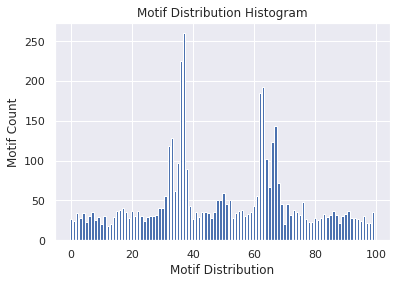

In [28]:
##OFFSET
#def plotlist(TF_counts):
TF_counts = RUNX1_o
sum_bins = []
x_axis = []
for indexpos, i in enumerate(range(0,len(TF_counts),30)):
    x_axis.append(indexpos)
    if i+30<2999: #loop by interval of 30 from -1499bp till end at 1500bp
        sum_bins.append(sum(TF_counts[i:i+30]))
    else:
        sum_bins.append(sum(TF_counts[i:]))
plt.bar(x_axis,sum_bins)
plt.xlabel('Motif Distribution')
plt.ylabel('Motif Count')
plt.title("Motif Distribution Histogram")
plt.show()

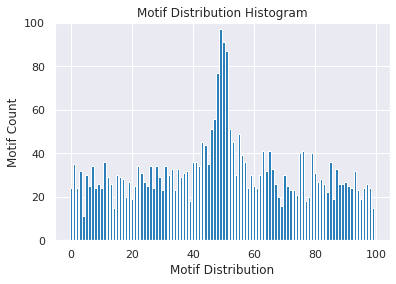

In [29]:
##ACTIVE
#def plotlist(TF_counts):
TF_counts_a = RUNX1_a
sum_bins = []
x_axis = []
for indexpos, i in enumerate(range(0,len(TF_counts_a),30)):
    x_axis.append(indexpos)
    if i+30<2999: #loop by interval of 30 from -1499bp till end at 1500bp
        sum_bins.append(sum(TF_counts_a[i:i+30]))
    else:
        sum_bins.append(sum(TF_counts_a[i:]))
fig = plt.bar(x_axis, sum_bins, color="#2c7fb8")
plt.rcParams['axes.facecolor'] = '#2c7fb8'#'edf8b1'
# ax.set_facecolor('#2c7fb8')
plt.ylim(0, 100)
plt.xlabel('Motif Distribution')
plt.ylabel('Motif Count')
plt.title("Motif Distribution Histogram")
plt.show()

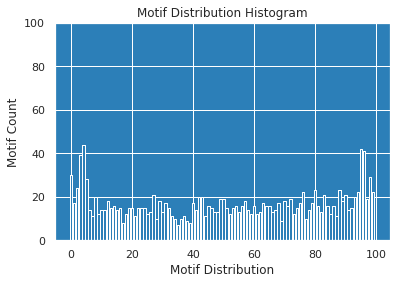

In [30]:
##INACTIVE
#def plotlist(TF_counts):
TF_counts_i = ANDR_i
sum_bins = []
x_axis = []
for indexpos, i in enumerate(range(0,len(TF_counts_i),30)):
    x_axis.append(indexpos)
    if i+30<2999: #loop by interval of 30 from -1499bp till end at 1500bp
        sum_bins.append(sum(TF_counts_i[i:i+30]))
    else:
        sum_bins.append(sum(TF_counts_i[i:]))
plt.bar(x_axis,sum_bins)
fig = plt.bar(x_axis, sum_bins, color="#2c7fb8")
plt.rcParams['axes.facecolor'] = '2c7fb8' #edf8b1' 
# ax.set_facecolor('#2c7fb8')
plt.ylim(0, 100)
plt.xlabel('Motif Distribution')
plt.ylabel('Motif Count')
plt.title("Motif Distribution Histogram")
plt.show()

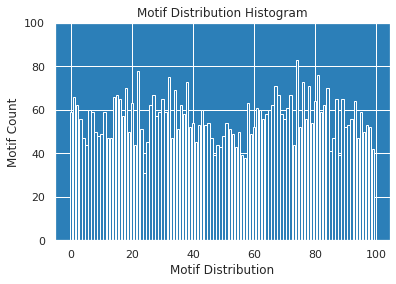

In [31]:
## INACTIVE IN HCT116, SRR1105736
#def plotlist(TF_counts):
TF_counts_i = HCT116_i
sum_bins = []
x_axis = []
for indexpos, i in enumerate(range(0,len(TF_counts_i),30)):
    x_axis.append(indexpos)
    if i+30<2999: #loop by interval of 30 from -1499bp till end at 1500bp
        sum_bins.append(sum(TF_counts_i[i:i+30]))
    else:
        sum_bins.append(sum(TF_counts_i[i:]))
fig = plt.bar(x_axis, sum_bins, color="#2c7fb8")
plt.rcParams['axes.facecolor'] = '#edf8b1'
# ax.set_facecolor('#2c7fb8')
plt.ylim(0, 100)
plt.xlabel('Motif Distribution')
plt.ylabel('Motif Count')
plt.title("Motif Distribution Histogram")
plt.show()

#### Smoothing via rolling window 150bp

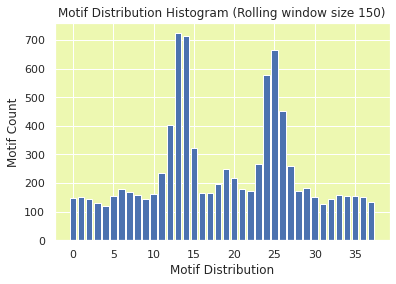

In [32]:
##OFFSET
rolling_bin_size = 150
half_bin_size = int(rolling_bin_size/2)
bin_hist_sum = []
x_num_bins = []
for point, i in enumerate(range(half_bin_size, len(TF_counts)-half_bin_size, half_bin_size)):
    total_sum = 0 #summation of bin values
    x_num_bins.append(point)
    for j in range(i-half_bin_size, i+half_bin_size):
        total_sum += RUNX1_o[j] #value at distance j
    bin_hist_sum.append(total_sum)
plt.bar (x_num_bins, bin_hist_sum)
plt.xlabel('Motif Distribution')
plt.ylabel('Motif Count')
plt.title("Motif Distribution Histogram (Rolling window size 150)")
plt.show()

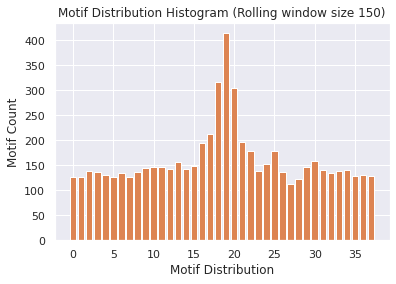

In [42]:
##ACTIVE
rolling_bin_size = 150
half_bin_size = int(rolling_bin_size/2)
bin_hist_sum_a = []
x_num_bins_a = []
for point, i in enumerate(range(half_bin_size, len(TF_counts_a)-half_bin_size, half_bin_size)):
    total_sum_a = 0 #summation of bin values
    x_num_bins_a.append(point)
    for j in range(i-half_bin_size, i+half_bin_size):
        total_sum_a += RUNX1_a[j] #value at distance j
    bin_hist_sum_a.append(total_sum_a)
plt.bar (x_num_bins_a, bin_hist_sum_a)
plt.xlabel('Motif Distribution')
plt.ylabel('Motif Count')
plt.title("Motif Distribution Histogram (Rolling window size 150)")
plt.show()

In [43]:
## Active heatmap
for point, i in enumerate(range(half_bin_size, len(TF_counts_a)-half_bin_size, half_bin_size)):
    total_sum_a = 0 #summation of bin values
    x_num_bins_a.append(point)
    for j in range(i-half_bin_size, i+half_bin_size):
        total_sum_a += RUNX1_a[j] #value at distance j
    bin_hist_sum_a.append(total_sum_a)
print(half_bin_size)
f, ax = plt.subplots(figsize=(5, 2))
# ax = sns.heatmap(x_num_bins_a, bin_hist_sum_a)
# print(bin_hist_sum_a)
ax = sns.heatmap([bin_hist_sum_a[0:40]], cmap="YlGnBu", vmin=0, vmax=500)
# plt.xlabel('Motif Distribution')
# plt.ylabel('Motif Count')
# plt.title("Motif Distribution Heatmap")
# plt.show()

75


2999
75
38


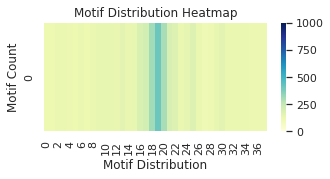

In [71]:
## Active heatmap
print(len(RUNX1_a))
print(half_bin_size)
bin_hist_sum_a = []
for point, i in enumerate(range(half_bin_size, len(TF_counts_i)-half_bin_size, half_bin_size)):
    total_sum_a = 0 #summation of bin values
    x_num_bins_a.append(point)
    for j in range(i-half_bin_size, i+half_bin_size):
        total_sum_a += RUNX1_a[j] #value at distance j
    bin_hist_sum_a.append(total_sum_a)
print(len(bin_hist_sum_a))
f, ax = plt.subplots(figsize=(5, 2))
# ax = sns.heatmap(x_num_bins_a, bin_hist_sum_a)
ax = sns.heatmap([bin_hist_sum_a], cmap="YlGnBu", vmin=0, vmax=1000)
plt.xlabel('Motif Distribution')
plt.ylabel('Motif Count')
plt.title("Motif Distribution Heatmap")
plt.show()

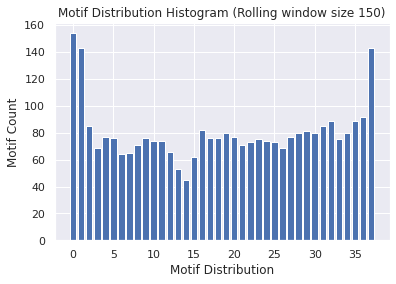

In [60]:
##INACTIVE HISTOGRAM
rolling_bin_size = 150
half_bin_size = int(rolling_bin_size/2)
bin_hist_sum_i = []
x_num_bins_i = []
for point, i in enumerate(range(half_bin_size, len(TF_counts_i)-half_bin_size, half_bin_size)):
    total_sum_i = 0 #summation of bin values
    x_num_bins_i.append(point)
    for j in range(i-half_bin_size, i+half_bin_size):
        total_sum_i += ANDR_i[j] #value at distance j
    bin_hist_sum_i.append(total_sum_i)
plt.bar (x_num_bins_i, bin_hist_sum_i)
# ax.set_axis_bgcolor("edf8b1")
plt.xlabel('Motif Distribution')
plt.ylabel('Motif Count')
plt.title("Motif Distribution Histogram (Rolling window size 150)")
plt.show()

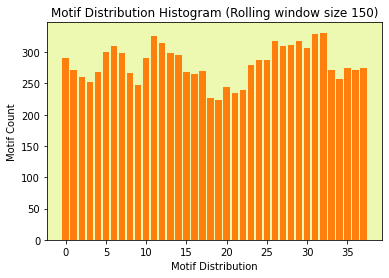

In [81]:
##INACTIVE HCT116_i
rolling_bin_size = 150
half_bin_size = int(rolling_bin_size/2)
bin_hist_sum_i = []
x_num_bins_i = []
for point, i in enumerate(range(half_bin_size, len(TF_counts_i)-half_bin_size, half_bin_size)):
    total_sum_i = 0 #summation of bin values
    x_num_bins_i.append(point)
    for j in range(i-half_bin_size, i+half_bin_size):
        total_sum_i += HCT116_i[j] #value at distance j
    bin_hist_sum_i.append(total_sum_i)
plt.bar (x_num_bins_i, bin_hist_sum_i)
# ax.set_axis_bgcolor("edf8b1")
plt.xlabel('Motif Distribution')
plt.ylabel('Motif Count')
plt.title("Motif Distribution Histogram (Rolling window size 150)")
plt.show()

[126, 126, 139, 136, 130, 126, 134, 126, 136, 145, 146, 147, 143, 157, 143, 148, 195, 212, 316, 414, 304, 197, 178, 139, 152, 178, 136, 113, 122, 147, 159, 140, 134, 139, 140, 129, 131, 129, 126, 126, 139, 136, 130, 126, 134, 126, 136, 145, 146, 147, 143, 157, 143, 148, 195, 212, 316, 414, 304, 197, 178, 139, 152, 178, 136, 113, 122, 147, 159, 140, 134, 139, 140, 129, 131, 129, 126, 126, 139, 136, 130, 126, 134, 126, 136, 145, 146, 147, 143, 157, 143, 148, 195, 212, 316, 414, 304, 197, 178, 139, 152, 178, 136, 113, 122, 147, 159, 140, 134, 139, 140, 129, 131, 129]


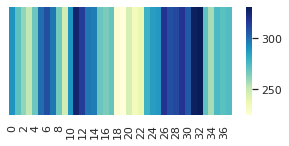

In [69]:
##INACTIVE
x_num_bins_a = []
for point, i in enumerate(range(half_bin_size, len(TF_counts_a)-half_bin_size, half_bin_size)):
    total_sum_a = 0 #summation of bin values
    x_num_bins_a.append(point)
    for j in range(i-half_bin_size, i+half_bin_size):
        total_sum_a += RUNX1_a[j] #value at distance j
    bin_hist_sum_a.append(total_sum_a)

f, ax = plt.subplots(figsize=(5, 2))
# ax = sns.heatmap(x_num_bins_a, bin_hist_sum_a)
print(bin_hist_sum_a)
ax = sns.heatmap([bin_hist_sum_i[0:40]], yticklabels=False, cmap="YlGnBu")
plt.show()

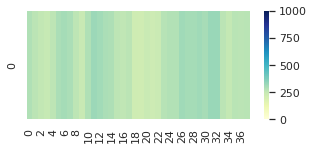

In [70]:
##INACTIVE Heatmap in HCT116, SRR1105736
bin_hist_sum_i = []
for point, i in enumerate(range(half_bin_size, len(TF_counts_i)-half_bin_size, half_bin_size)):
    total_sum_i = 0 #summation of bin values
    x_num_bins_i.append(point)
    for j in range(i-half_bin_size, i+half_bin_size):
        total_sum_i += HCT116_i[j] #value at distance j
    bin_hist_sum_i.append(total_sum_i)

f, ax = plt.subplots(figsize=(5, 2))
# ax = sns.heatmap(x_num_bins_i, bin_hist_sum_i)
# print(bin_hist_sum_i)
# ax = sns.heatmap([bin_hist_sum_HCT116_i[0:40]], yticklabels=False, cmap="YlGnBu")
ax = sns.heatmap([bin_hist_sum_i[0:38]], cmap="YlGnBu", vmin=0, vmax=1000)
# plt.xlabel('Motif Distribution')
# plt.ylabel('Motif Count')
# plt.title("Motif Distribution Heatmap")
plt.show()

#### Statistic of MD (window bin of 150bp)

In [137]:
##OFFSET
mean = np.mean(bin_hist_sum)
# print(bin_hist_sum)
stdev = np.std(bin_hist_sum)
variance_1 = np.var(bin_hist_sum, ddof=1) #unbiased estimator of variance
variance_0 = np.var(bin_hist_sum, ddof=0) #maximum likelihood estimate of variance 
stdev_2plus = float(mean) + float(2*stdev)
stdev_2neg = float(mean) - float(2*stdev)
print ("mean = {}".format(mean))
print ("standard deviation = {}".format(stdev))
print ("variance = {}".format(variance_0))
print ("2 +/- standard deviation = {}, {}".format(stdev_2plus, stdev_2neg))

[147, 150, 144, 130, 120, 156, 179, 169, 160, 145, 161, 237, 404, 724, 714, 324, 164, 166, 198, 249, 217, 181, 173, 266, 579, 666, 452, 261, 171, 184, 153, 126, 143, 158, 154, 155, 153, 133]
mean = 241.21052631578948
standard deviation = 164.24262506790578
variance = 26975.639889196675
2 +/- standard deviation = 569.695776451601, -87.27472382002207


In [139]:
##ACTIVE
mean_a = np.mean(bin_hist_sum_a)
# print(bin_hist_sum_a)
stdev_a = np.std(bin_hist_sum_a)
variance_1_a = np.var(bin_hist_sum_a, ddof=1) #unbiased estimator of variance
variance_0_a = np.var(bin_hist_sum_a, ddof=0) #maximum likelihood estimate of variance 
stdev_2plus_a = float(mean_a) + float(2*stdev_a)
stdev_2neg_a = float(mean_a) - float(2*stdev_a)
print ("mean = {}".format(mean_a))
print ("standard deviation = {}".format(stdev_a))
print ("variance = {}".format(variance_0_a))
print ("2 +/- standard deviation = {}, {}".format(stdev_2plus_a, stdev_2neg_a))

mean = 160.8421052631579
standard deviation = 59.42820804430621
variance = 3531.7119113573413
2 +/- standard deviation = 279.6985213517703, 41.98568917454547


In [140]:
##INACTIVE
mean_i = np.mean(bin_hist_sum_i)
# print(bin_hist_sum_i)
stdev_i = np.std(bin_hist_sum_i)
variance_1_i = np.var(bin_hist_sum_i, ddof=1) #unbiased estimator of variance
variance_0_i = np.var(bin_hist_sum_i, ddof=0) #maximum likelihood estimate of variance 
stdev_2plus_i = float(mean_i) + float(2*stdev_i)
stdev_2neg_i = float(mean_i) - float(2*stdev_i)
print ("mean = {}".format(mean_i))
print ("standard deviation = {}".format(stdev_i))
print ("variance = {}".format(variance_0_i))
print ("2 +/- standard deviation = {}, {}".format(stdev_2plus_i, stdev_2neg_i))

mean = 80.28947368421052
standard deviation = 21.44627055633737
variance = 459.9425207756232
2 +/- standard deviation = 123.18201479688526, 37.39693257153578


#### Normal distribution
Plot pdf or cdf?

Sorted bins [120, 126, 130, 133, 143, 144, 145, 147, 150, 153, 153, 154, 155, 156, 158, 160, 161, 164, 166, 169, 171, 173, 179, 181, 184, 198, 217, 237, 249, 261, 266, 324, 404, 452, 579, 666, 714, 724]: 


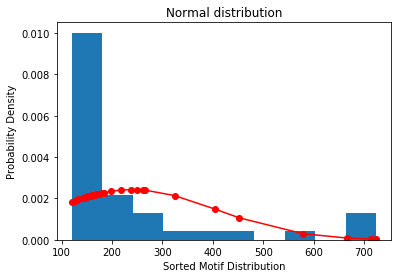

In [64]:
##OFFSET
bsort = sorted(bin_hist_sum)
print('Sorted bins {}: '.format(bsort,))
b_mean = np.mean(bin_hist_sum)
b_std = np.std(bin_hist_sum)
pdf = stats.norm.pdf(bsort, np.mean(bsort), np.std(bsort))  #probability distribution
cdf = stats.norm.cdf(bsort, np.mean(bsort), np.std(bsort))  #cumulative distribution function (integral of pdf)
plt.plot(bsort, pdf, '-ro')
plt.hist(bsort, normed=True)
plt.xlabel('Sorted Motif Distribution')
plt.ylabel('Probability Density')
plt.title("Normal distribution")
plt.show()

Sorted bins [113, 122, 126, 126, 126, 126, 129, 129, 130, 131, 134, 134, 136, 136, 136, 139, 139, 139, 140, 140, 143, 143, 145, 146, 147, 147, 148, 152, 157, 159, 178, 178, 195, 197, 212, 304, 316, 414]: 


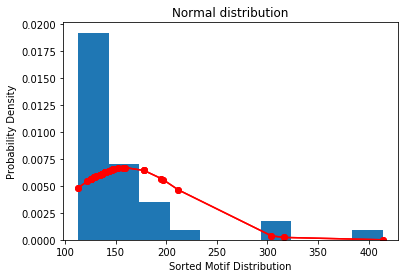

In [95]:
##ACTIVE
bsort_a = sorted(bin_hist_sum_a)
print('Sorted bins {}: '.format(bsort_a,))
b_mean_a = np.mean(bin_hist_sum_a)
b_std_a = np.std(bin_hist_sum_a)
pdf_a = stats.norm.pdf(bsort_a, np.mean(bsort_a), np.std(bsort_a))  #probability distribution
cdf_a = stats.norm.cdf(bsort_a, np.mean(bsort_a), np.std(bsort_a))  #cumulative distribution function (integral of pdf)
plt.plot(bsort_a, pdf_a, '-ro')
plt.hist(bsort_a, normed=True)
plt.xlabel('Sorted Motif Distribution')
plt.ylabel('Probability Density')
plt.title("Normal distribution")
plt.show()

Sorted bins [45, 53, 62, 64, 65, 66, 69, 69, 71, 71, 73, 73, 74, 74, 74, 75, 75, 76, 76, 76, 76, 77, 77, 77, 80, 80, 80, 80, 81, 82, 85, 85, 89, 89, 92, 143, 143, 154]: 
[  4.80404766e-03   8.27874668e-03   1.29310102e-02   1.39406542e-02
   1.44275355e-02   1.48989929e-02   1.61951798e-02   1.61951798e-02
   1.69362464e-02   1.69362464e-02   1.75578612e-02   1.75578612e-02
   1.78189652e-02   1.78189652e-02   1.78189652e-02   1.80446769e-02
   1.80446769e-02   1.82335615e-02   1.82335615e-02   1.82335615e-02
   1.82335615e-02   1.83844087e-02   1.83844087e-02   1.83844087e-02
   1.86002475e-02   1.86002475e-02   1.86002475e-02   1.86002475e-02
   1.85917357e-02   1.85428683e-02   1.81586027e-02   1.81586027e-02
   1.71292021e-02   1.71292021e-02   1.60255772e-02   2.58762553e-04
   2.58762553e-04   5.06320986e-05]


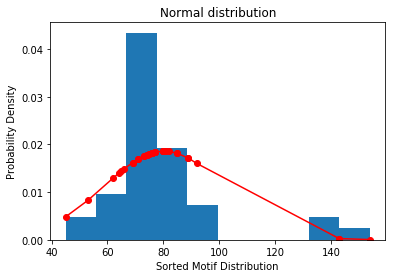

In [147]:
##INACTIVE
bsort_i = sorted(bin_hist_sum_i)
print('Sorted bins {}: '.format(bsort_i,))
b_mean_i = np.mean(bin_hist_sum_i)
b_std_i = np.std(bin_hist_sum_i)
pdf_i = stats.norm.pdf(bsort_i, np.mean(bsort_i), np.std(bsort_i))  #probability distribution
print (pdf_i)
cdf_i = stats.norm.cdf(bsort_i, np.mean(bsort_i), np.std(bsort_i))  #cumulative distribution function (integral of pdf)
plt.plot(bsort_i, pdf_i, '-ro')
plt.hist(bsort_i, normed=True)
plt.xlabel('Sorted Motif Distribution')
plt.ylabel('Probability Density')
plt.title("Normal distribution")
plt.show()

#### Uniform distribution

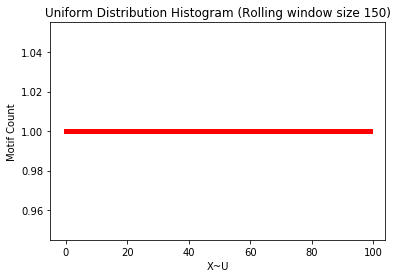

In [6]:
num_hist_bins = len(bin_hist_sum)
pdf_unsort = stats.norm.pdf(bin_hist_sum, np.mean(bin_hist_sum), np.std(bin_hist_sum))
# print (pdf_unsort)
# low = min(bin_hist_sum)
# high = max(bin_hist_sum)
low = min(pdf_unsort)
high = max(pdf_unsort)
# uniform_array = np.random.uniform(low=0.0, high=1.0, size=None) #default
uniform_array = np.random.uniform(low, high, size=100)
# print (uniform_array)
plt.plot(np.ones_like(uniform_array), linewidth=5, color='r')
# plt.hist(bin_hist_sum, num_hist_bins, density = True, histtype='stepfilled', color='blue') #data array, number bin, density
plt.xlabel('X~U')
plt.ylabel('Motif Count')
plt.title("Uniform Distribution Histogram (Rolling window size 150)")
# plt.show()
# plt.hist(pdf_unsort, num_hist_bins, density = True, histtype='stepfilled', color='blue') #data array, number bin, density

plt.show()


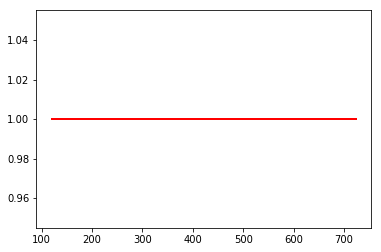

In [78]:

# x = np.linspace(uniform.ppf(0.01), uniform.ppf(0.99), 100)
# ax.plot(x, uniform.pdf(x),'r-', lw=5, alpha=0.6, label='uniform pdf')
# ax.plot(x, uniform.cdf(x),'b-', lw=5, alpha=0.6, label='uniform cdf')
# # Check accuracy of ``cdf`` and ``ppf``:
# vals = uniform.ppf([0.001, 0.5, 0.999])
# np.allclose([0.001, 0.5, 0.999], uniform.cdf(vals))

# # generate random numbers:
# r = uniform.rvs(size=1000)
# # and compare the histogram:
# ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
# ax.legend(loc='best', frameon=False)
# plt.show()

# s = np.random.uniform(-1,0,1000)
# import matplotlib.pyplot as plt
# count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bin_hist_sum, np.ones_like(bin_hist_sum), linewidth=2, color='r')
plt.show()

#### Exponential decay

A = 796.29909129
t = -0.00187314698083
y0 = 139.571835431



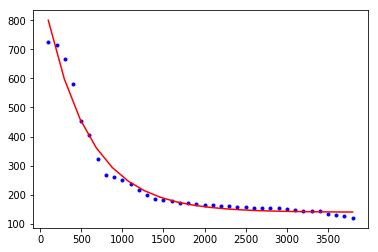

In [25]:
def model_func(x, a, k, b):
    return a * np.exp(-k*x) + b

# sample data
# x = np.array([399.75, 989.25, 1578.75, 2168.25, 2757.75, 3347.25, 3936.75, 4526.25, 5115.75, 5705.25])
# y = np.array([109,62,39,13,10,4,2,0,1,2])

# x = np.arange(-1499, 1499, 79)
x = np.arange(100, 3900, 100)
y = sorted(bin_hist_sum, reverse=True)
# y = bin_hist_sum


smoothx = np.linspace(x[0], x[-1], 20)
guess_a, guess_b, guess_c = 4000, -0.005, 100
guess = [guess_a, guess_b, guess_c]
exp_decay = lambda x, A, t, y0: A * np.exp(x * t) + y0
params, cov = curve_fit(exp_decay, x, y, p0=guess)

A, t, y0 = params

print ('A = %s\nt = %s\ny0 = %s\n' % (A, t, y0))

pl.clf()
best_fit = lambda x: A * np.exp(t * x) + y0

pl.plot(x, y, 'b.')
pl.plot(smoothx, best_fit(smoothx), 'r-')
pl.show()

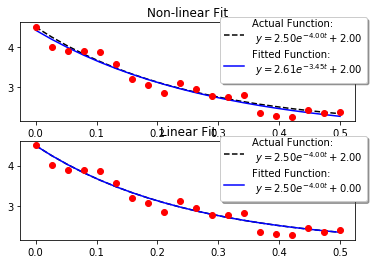

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize


def main():
    # Actual parameters
    A0, K0, C0 = 2.5, -4.0, 2.0

    # Generate some data based on these
    tmin, tmax = 0, 0.5
    num = 20
    t = np.linspace(tmin, tmax, num)
    y = model_func(t, A0, K0, C0)

    # Add noise
    noisy_y = y + 0.5 * (np.random.random(num) - 0.5)

    fig = plt.figure()
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)

    # Non-linear Fit
    A, K, C = fit_exp_nonlinear(t, noisy_y)
    fit_y = model_func(t, A, K, C)
    plot(ax1, t, y, noisy_y, fit_y, (A0, K0, C0), (A, K, C0))
    ax1.set_title('Non-linear Fit')

    # Linear Fit (Note that we have to provide the y-offset ("C") value!!
    A, K = fit_exp_linear(t, y, C0)
    fit_y = model_func(t, A, K, C0)
    plot(ax2, t, y, noisy_y, fit_y, (A0, K0, C0), (A, K, 0))
    ax2.set_title('Linear Fit')
    plt.show()

def model_func(t, A, K, C):
    return A * np.exp(K * t) + C

def fit_exp_linear(t, y, C=0):
    y = y - C
    y = np.log(y)
    K, A_log = np.polyfit(t, y, 1)
    A = np.exp(A_log)
    return A, K

def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y, maxfev=1000)
    A, K, C = opt_parms
    return A, K, C

def plot(ax, t, y, noisy_y, fit_y, orig_parms, fit_parms):
    A0, K0, C0 = orig_parms
    A, K, C = fit_parms

    ax.plot(t, y, 'k--', 
      label='Actual Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A0, K0, C0))
    ax.plot(t, fit_y, 'b-',
      label='Fitted Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (A, K, C))
    ax.plot(t, noisy_y, 'ro')
    ax.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True)

if __name__ == '__main__':
    main()

In [35]:
"""
compute an exponential decay fit to two vectors of x and y data
result is in form y = a + b * exp(c*x).
ref. https://gist.github.com/johanvdw/443a820a7f4ffa7e9f8997481d7ca8b3
"""
def exp_est(x,y):
    n = np.size(x)
    # sort the data into ascending x rder
    y = y[np.argsort(x)]
    x = x[np.argsort(x)]

    Sk = np.zeros(n)

    for n in range(1,n):
        Sk[n] = Sk[n-1] + (y[n] + y[n-1])*(x[n]-x[n-1])/2
    dx = x - x[0]
    dy = y - y[0]

    m1 = np.matrix([[np.sum(dx**2), np.sum(dx*Sk)],
                    [np.sum(dx*Sk), np.sum(Sk**2)]])
    m2 = np.matrix([np.sum(dx*dy), np.sum(dy*Sk)])

    [d, c] = (m1.I * m2.T).flat

    m3 = np.matrix([[n, np.sum(np.exp(  c*x))],
                    [np.sum(np.exp(c*x)),np.sum(np.exp(2*c*x))]])

    m4 = np.matrix([np.sum(y), np.sum(y*np.exp(c*x).T)])

    [a, b] = (m3.I * m4.T).flat

    return [a,b,c]

exp_est(x,y)

TypeError: only integer scalar arrays can be converted to a scalar index